# ITV Step Up Data Challenge: Data Science
Welcome to the ITV Step Up Data Challenge, Data Science part! This is where the real fun begins as you get to work with a dataset that closely resembles the kind of data that we use in the industry to build machine learning models. The goal is to predict the viewing behavior of individual users, which can be used to create personalized advertising and marketing campaigns or show recommendations.

You are going to have an exciting task to work on, which is to figure out who is most likely to watch the new ITVX Original 'A Spy Among Friends', which was released exclusively on ITVX on December 8th, 2022. We have collected data on our viewers for the past three months, which you will use to build a machine learning model that will help us identify potential viewers of the new show. This is a great opportunity for you to put your data science skills to the test and make a real impact on the business. Let's get started and see how accurate your predictions can be!

It's good to have an idea what the show is about before you start exploring the data we have. Maybe this will give you some initial ideas for what sort of behavioural traits could predict whether or not someone watches this show. Here is the [IMDB Link](https://www.imdb.com/title/tt15565872/).

### Before you get started
This notebook is created to give you a taste of what data science is all about. If you're already well-versed in coding and data science, we challenge you to put your skills to the test by creating your own notebook from scratch.

Throughout this notebook, you will find numerous examples of different data science tasks including data exploration, cleaning, feature engineering, and modeling. However, we want to encourage you to take an active role in the learning process by trying to implement something on your own when you see a 'TODO' section. Whether you choose to follow the provided examples or come up with something entirely new, by the end of this notebook, you will have the ability to create a much better model than the baseline model provided. This notebook is an excellent opportunity to gain hands-on experience and learn about the various challenges that come with working with this type of data.

Remember, the internet is your friend. Even the most experienced data scientists are googling how to do something on the daily. This is completely normal, and its how you learn. Go see how others have feature engineered a similar column, bookmark the documentation of python libraries such as [pandas](https://pandas.pydata.org/docs/) and [sklearn](https://scikit-learn.org/stable/getting_started.html), or have a look at how similar problems have been solved over at [Kaggle](https://www.kaggle.com/). The number of possible roads you can go down here is practically limitless, and whatever you end up doing - you'll probably learn something new. It's all about exploration!

Lets get started!

Do Shift+Enter to run the below cells. It might take a minute or so to get started.

In [107]:
# lets import some python libraries that will help us out
import pandas as pd
import numpy as np
import sklearn
import matplotlib

# and do some initial set up
pd.set_option('display.max_columns', 500)

In [108]:
# Lets load in our dataset...
data = pd.read_csv("DIG_step_up_user_data.csv", encoding='mac_roman').set_index("user_id")
print(data)

                                              n_sessions  \
user_id                                                    
NaN                                                   88   
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=          13   
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=          26   
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=          39   
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=          67   
...                                                  ...   
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=          19   
zkr6KprLNGHxaRrHPGs/vqgYEKetsunUyW+H7FXlgK4=          27   
zoIyf1raNu8xfnF51ICqjJhiDDwmD1NIbXw3l65xSyo=          61   
ztIVvNPSTAzd12wlEFHaI9lciI9lgHa5VJFxYgqfzOk=          42   
zyikXJ6pnium8X6j2AB/pBDdU6UEQZfMQi0ncOMjgAw=          17   

                                              n_programmes_watched  \
user_id                                                              
NaN                                                             31   
+1FV4TIbF

## Exploring the dataset

Exploring data is important because it helps you understand what the data looks like and what patterns it contains before you start building models or making predictions. It's like taking a sneak peek at your data before you dive into it. By exploring the data, you can identify any potential issues or problems, such as missing values or outliers, that could affect the accuracy of your models. Additionally, exploring the data can also help you gain insights and generate hypotheses that can guide your analysis. Essentially, it's a crucial first step in making sense of your data and ensuring that your analysis is as accurate and meaningful as possible.

In [4]:
# lets first just take a look at it, does it look right? Can you spot anything that seems off?
display(data)

# there are a lot of missing values that could affect the dataset at one point

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes_1,top_3_programmes_2,top_3_programmes_3,top_3_programmes_4,top_3_programmes_5,top_3_genres_1,top_3_genres_2,top_3_genres_3,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres_1,top_3_subgenres_2,top_3_subgenres_3,age,gender
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,88,31,71,['WORLD CUP','CORONATION STREET','THE MOTORBIKE SHOW'],NaN,NaN,['DRAMA','FACTUAL','SPORT'],0.00,44740.84,14741.88,21813.69,3746.00,15194.38,7101.02,69.48,407.71,1325.93,974.73,20721.63,16172.92,54245.06,9097.18,68075.81,23937.70,8223.28,10.0,26210.93,100236.79,True,['LONG RUNNING DRAMA','FOOTBALL','EVENT'],30.0,Other
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,13,5,7,['WITHOUT SIN','EMMERDALE','CORONATION STREET'],NaN,NaN,['DRAMA'],NaN,NaN,0.00,10650.88,0.00,0.00,0.00,0.00,908.95,0.00,0.00,0.00,0.00,0.00,7309.58,3341.30,0.00,10650.88,0.00,0.00,1.0,1561.35,10650.88,True,['CRIME AND THRILLER','LONG RUNNING DRAMA','CRIME'],33.0,Female
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,26,7,15,['WORLD CUP',"""I'M A CELEBRITY... GET ME OUT OF HERE!""",'LOVE ISLAND'],NaN,NaN,['ENTERTAINMENT','SPORT','DRAMA'],65.07,12189.13,11231.67,29174.26,0.00,0.00,4269.11,673.81,0.00,0.00,0.00,0.00,0.00,39088.83,13571.29,52660.12,0.00,0.00,1.0,7201.88,52660.12,True,['FOOTBALL','EVENT','CELEBRITY'],33.0,Male
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,39,8,22,['A SPY AMONG FRIENDS','A CONFESSION','WITHOUT SIN'],NaN,NaN,['DRAMA','ENTERTAINMENT','OTHER'],0.00,78194.43,286.35,0.00,4.66,0.00,1132.38,0.00,2431.01,0.00,0.00,3012.44,13933.15,36104.81,25435.04,78485.44,0.00,0.00,2.0,0.00,78485.44,True,['CRIME AND THRILLER','BASED ON A TRUE STORY','CELEBRITY'],36.0,Prefer not to answer
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,67,18,47,['WORLD CUP','FEARLESS','THE WALK-IN'],NaN,NaN,['SPORT','ENTERTAINMENT','DRAMA'],0.00,17670.60,11802.85,144107.09,0.00,3408.63,17672.76,0.00,0.00,0.00,0.00,18512.08,25081.57,108080.54,25314.97,0.00,0.00,0.00,1.0,70648.59,176989.17,True,['FOOTBALL','EVENT','CRIME AND THRILLER'],32.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=,19,10,18,['WORLD CUP',"""I'M A CELEBRITY... GET ME OUT OF HERE!""",'THE LARKINS'],NaN,NaN,['SPORT','DRAMA','ENTERTAINMENT'],0.00,18113.98,6554.57,13111.29,0.00,0.00,3335.12,0.00,45.42,0.00,298.45,0.00,8565.65,15990.76,13223.42,37779.83,0.00,0.00,2.0,6806.12,37779.83,True,['FOOTBALL','EVENT','CELEBRITY'],33.0,Male
zkr6KprLNGHxaRrHPGs/vqgYEKetsunUyW+H7FXlgK4=,27,2,12,"[""I'M A CELEBRITY... GET ME OUT OF HERE!""",'GORDON,GINO & FRED: ROAD TRIP'],NaN,NaN,['ENTERTAINMENT'],NaN,NaN,0.00,0.00,22751.18,0.00,0.00,0.00,2275.12,0.00,0.00,0.00,0.00,0.00,0.00,5612.70,0.00,22751.18,0.00,0.00,1.0,507.49,22751.18,False,['CELEBRITY','FACTUAL','TRAVEL'],40.0,Male
zoIyf1raNu8xfnF51ICqjJhiDDwmD1NIbXw3l65xSyo=,61,19,43,"[""I'M A CELEBRITY... GET ME OUT OF HERE!""",'CORONATION STREET','THE MASKED SINGER'],NaN,NaN,['ENTERTAINMENT','DRAMA','SPORT'],0.00,454.29,45363.42,4581.75,6373.26,42.59,5680.36,0.00,0.00,0.00,1.17,1552.47,2908.17,23986.03,283

It's important to thoroughly investigate any unusual observations you may come across during the data exploration process. By doing so, you can make informed decisions on whether to remove certain rows or columns that may be affecting the accuracy of your analysis.

Lets look at some statistics on the columns

In [30]:
# for quick statistics you can use the pandas describe method
#   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

round(data.describe(),2)

,n_sessions,n_programmes_watched,n_episodes_watched,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,age
count,1771.00,1771.00,1771.00,1771.00,1771.00,1771.00,1771.00,1771.00,1771.00,1771.00,1771.00,1771.00,1771.00,1771.00,1771.00,1771.00,1771.00,1771.00,1771.00,1771.00,1771.00,1745.00,1771.00,1771.00,1658.00
mean,29.96,7.02,20.22,725.23,25707.08,9988.01,5504.61,2463.99,1364.31,2774.02,245.60,688.59,110.35,96.92,4742.14,8407.82,19774.85,12231.84,41520.64,1606.33,1191.88,1.45,13468.64,43148.88,34.94
std,52.82,9.91,35.35,8587.75,61589.11,28042.10,18455.43,9082.03,5368.06,5481.12,1407.01,3556.38,564.12,680.99,14771.75,20208.51,36174.22,36613.74,82701.86,12708.63,8397.32,0.70,25705.34,80555.21,5.07
min,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,18.00
25%,4.00,2.00,4.00,0.00,182.44,0.00,0.00,0.00,0.00,153.68,0.00,0.00,0.00,0.00,0.00,0.00,1459.39,0.00,2272.77,0.00,0.00,1.00,103.08,4019.50,32.00
50%,12.00,4.00,8.00,0.00,6782.46,324.63,0.00,0.00,0.00,892.58,0.00,0.00,0.00,0.00,0.00,1025.37,6943.56,2831.73,12973.56,0.00,0.00,1.00,4694.70,15436.02,35.00
75%,32.50,8.00,21.00,0.00,25035.22,7437.64,1649.63,292.40,9.38,2907.00,39.43,4.37,0.00,0.00,2805.06,7178.96,22215.85,10420.61,42023.87,0.00,0.00,2.00,14555.85,44126.48,38.00
max,686.00,111.00,407.00,330652.94,968471.93,425848.62,228739.00,153076.99,89798.86,54950.36,49007.47,68428.97,8918.70,14705.00,189202.35,332942.25,446846.43,774244.75,1016244.40,468060.33,190693.61,10.00,279514.87,1016244.40,50.00


In [34]:
# for categorical variables:
data.describe(include="object")   # this shows the summary for the columns that includes characters/strings 

# if we wanted the data for numbers, we would do data.describe()

,top_3_programmes_1,top_3_programmes_2,top_3_programmes_3,top_3_programmes_4,top_3_programmes_5,top_3_genres_1,top_3_genres_2,top_3_genres_3,top_3_subgenres_1,top_3_subgenres_2,top_3_subgenres_3,gender
count,1771,1449,1153,14,2,1745,1196,711,1771,1490,1249,1691
unique,263,349,302,10,2,12,12,6,75,98,73,4
top,['WORLD CUP','A SPY AMONG FRIENDS','A SPY AMONG FRIENDS'],HIS WIFE AND THE CANOE'],MURDER'],['DRAMA','ENTERTAINMENT','FACTUAL'],['CRIME AND THRILLER','EVENT','CRIME AND THRILLER'],Male
freq,237,150,96,3,1,594,254,156,426,214,140,671


Plotting data is a helpful tool for data exploration because it allows you to visualize the distribution and patterns in the data in a way that is easy to understand. With a visual representation of the data, you can quickly identify trends, outliers, and any other interesting features of the data that might not be immediately apparent from looking at the raw data. Additionally, different types of plots are useful for different kinds of data and questions, for example, a scatter plot for relationship between two continuous variables, or a histogram for distribution of continuous data.

<Axes: xlabel='n_episodes_watched', ylabel='Frequency'>

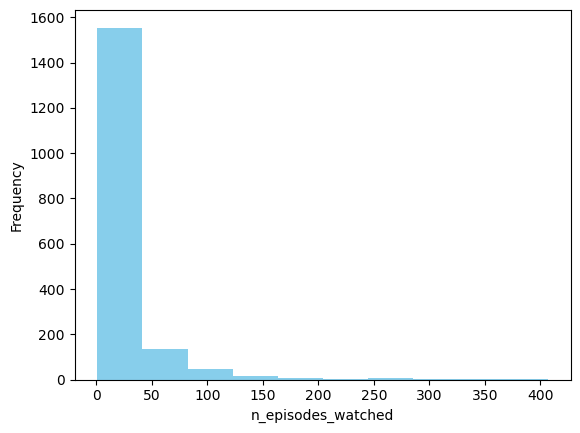

In [35]:
# you can plot any variable using the pandas dataframe plot method: 
#     https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
# here are some examples:
column_to_plot = "n_episodes_watched"
example_plot_1 = data[column_to_plot].plot(kind="hist",color = 'skyblue')  # histogram of a numerical column
example_plot_1.set_xlabel(column_to_plot)

example_plot_1

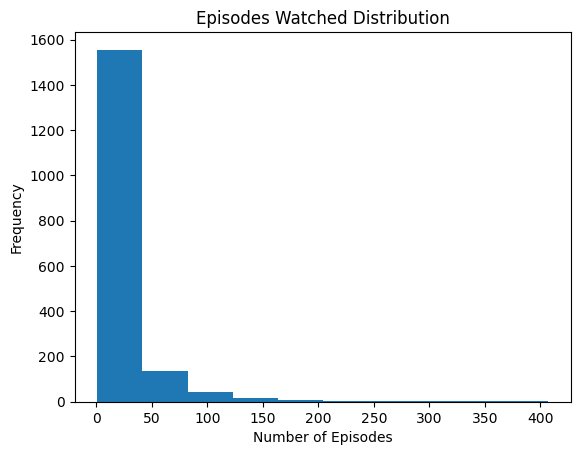

In [7]:
import matplotlib.pyplot as plt
data["n_episodes_watched"].hist()
plt.title("Episodes Watched Distribution")
plt.xlabel("Number of Episodes")
plt.ylabel("Frequency")
plt.grid(False) 

In [ ]:
# different ways of creating plots (in this case histograms)

#1. data.plot() => quick and easy plotting method built into Pandas df 
                => fast plot with minimal code: plot one column or compare columns 
                => you do not have full control over the styling 

    e.g.: data['age'].plot(kind='hist')


#2.plt.plot() => base plotting library; pandas, seaborn and other libraries build on top of it 
              => full control over plot appearance: adjust fonts, gridlines, axis ticks etc
              => building professional or publication-quality plots 
                  
    e.g.: import matplotlib.pyplot as plt 
          plt.hist(data['age'], bins = 20, color = 'red')
          plt.title("Age Distribution')
          plt.xlabel("Age")
          plt.ylabel("Frequency")
          plt.grid(False) => shows no gridlines within the plot 
          plt.show()


#3. sns.plot() => visualisation library, providing prettier, statistics-aware plots 
               => visuals that look good without much code – automatic styling (colors, themes, spacing)
               => statistical plots: histograms + KDE, boxplots, violin plots, pair plots, regression plots

    e.g.: import seaborn as sns 
          sns.histplot(data['Age'], kde = True)


Text(0, 0.5, 'Frequency')

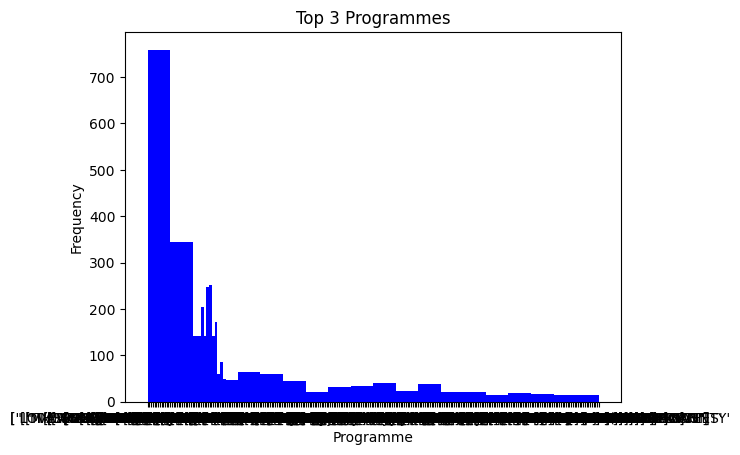

In [7]:
import matplotlib.pyplot as plt

plt.hist(data['age'], bins = 20, color = 'blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.hist(data['top_3_programmes_1'], bins = 20, color = 'blue')
plt.title("Top 3 Programmes")
plt.xlabel("Programme")
plt.ylabel("Frequency")



/Users/antonia/Public/cursuri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

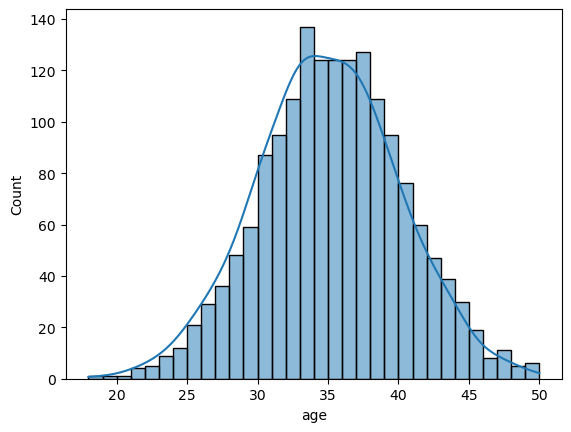

In [109]:
import seaborn as sns 

sns.histplot(data['age'], kde = True)

<Axes: xlabel='Gender', ylabel='Number of'>

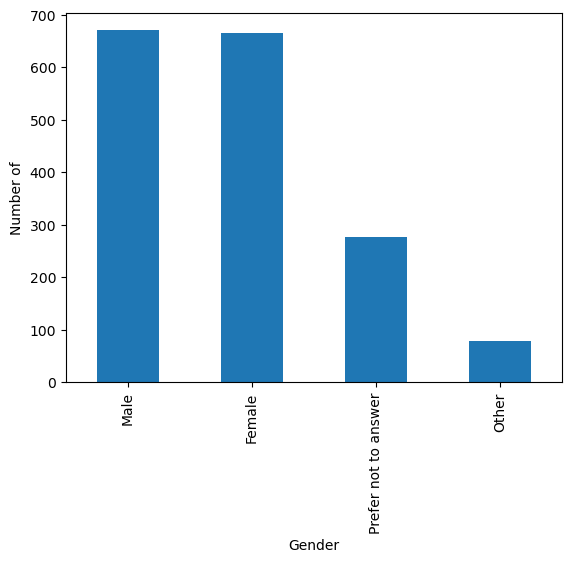

In [7]:
# for categorical columns, we might want to make a bar chart
column_to_plot = "gender"
example_plot_2 = data['gender'].value_counts().plot(kind='bar')
example_plot_2.set_xlabel('Gender')
example_plot_2.set_ylabel('Number of')
example_plot_2 

Axes(0.22375,0.11;0.5775x0.77)
Axes(0.22375,0.11;0.5775x0.77)


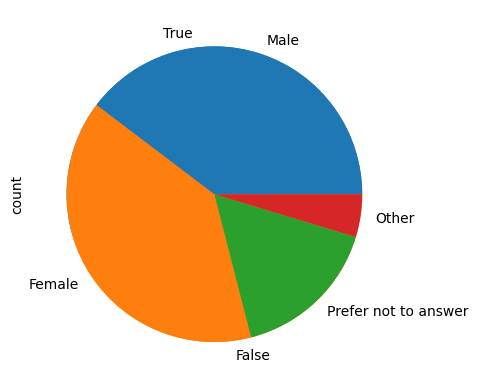

In [29]:
# ... or a pie chart
print(data["any_spy_among_friends_consumption"].value_counts().plot(kind="pie"))
pie_2 = data['gender'].value_counts().plot(kind = 'pie')
print(pie_2)

This is actually our target variable (`any_spy_among_friends_consumption`), and we can see about half of our users have watched A Spy Among Friends

<Axes: title={'center': 'Viewing Time vs Programmes Watched'}, xlabel='Number of Programmes Watched', ylabel='Total Consumption (seconds)'>

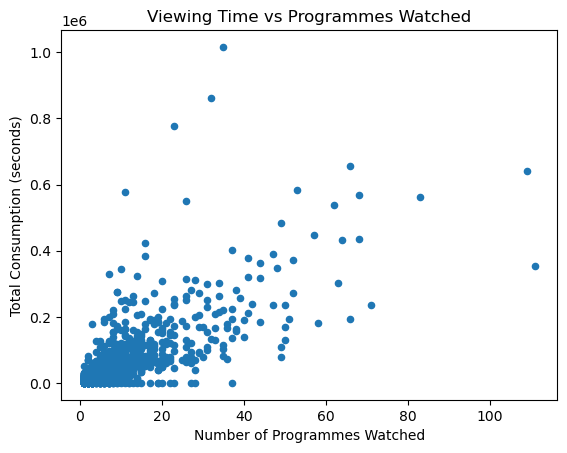

In [14]:
# here we're plotting the total consumption seconds by number of programmes watched, we should expect a linar relationship
data[["n_programmes_watched", "total_consumption_seconds"]].plot(kind="scatter", x="n_programmes_watched", y="total_consumption_seconds", 
    xlabel="Number of Programmes Watched",      
    ylabel="Total Consumption (seconds)",
    title="Viewing Time vs Programmes Watched" )

11.99
0    0.0
Name: total_consumption_hours, dtype: float64
n_sessions                                          0
n_programmes_watched                                0
n_episodes_watched                                  0
top_3_programmes_1                                  0
top_3_programmes_2                                322
top_3_programmes_3                                618
top_3_programmes_4                               1757
top_3_programmes_5                               1769
top_3_genres_1                                     26
top_3_genres_2                                    575
top_3_genres_3                                   1060
total_genre_comedy_consumption_seconds              0
total_genre_drama_consumption_seconds               0
total_genre_entertainment_consumption_seconds       0
total_genre_sport_consumption_seconds               0
total_genre_other_consumption_seconds               0
total_genre_factual_consumption_seconds             0
total_channel_ITV_con

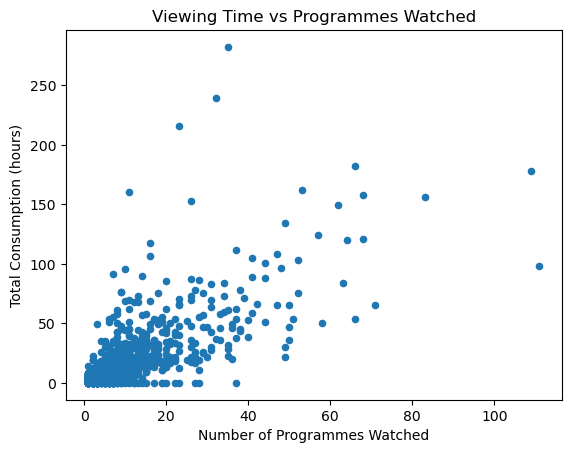

In [60]:
data["total_consumption_hours"] = data["total_consumption_seconds"] / 3600

data[["n_programmes_watched", 'total_consumption_hours']].plot(kind = 'scatter', x = 'n_programmes_watched', y = 'total_consumption_hours',
            xlabel = 'Number of Programmes Watched',
            ylabel = 'Total Consumption (hours)',
            title = 'Viewing Time vs Programmes Watched')

print(round(data['total_consumption_hours'].mean(),2))
print(data['total_consumption_hours'].mode())
print(data.isna().sum())

Ask yourself questions such as: Does the data have an acceptable distribution? Are there any extreme data points that appear abnormal? How can these be handled to improve the integrity of the analysis?

1. The data presents a highly right-skewed distribution, with the average subscriber watching <20 programmes spending a total number of streaming hours between 0 - 50, with an average of 11.9 hours of streaming and a mode of 0.

2. We also notice some outliers, both in terms of numbers of programmes watched, as well as in the amount of streaming hours.

3. There is a clear positive trend between the number of programmes watched and total streaming time. A linear regression would show a positive slope, indicating that generally, higher programme counts correspond to more hours watched. While outlines widen the spread and may affect the strength of correlation, the positive direction of the relationship is not affected.

Potential explanations for outliers: 
- multiple log-ins from different devices under one accounts (family sharing the subscription)
- individuals who have more free time (unemployed, retired, elderly, stay-at-home parents, children), binge-watchers, left in the background while doing other work (working from home)
- auto-play on
- individuals trying multiple genres, changing programmes frequently 

In [10]:
# TODO: plot and explore the other feature columns in the data

<Axes: title={'center': 'Viewing Time vs Programmes Watched for those who watched the show (blue) and those who have not (purple)'}, xlabel='Number of Programmes Watched', ylabel='Total Consumption (hours)'>

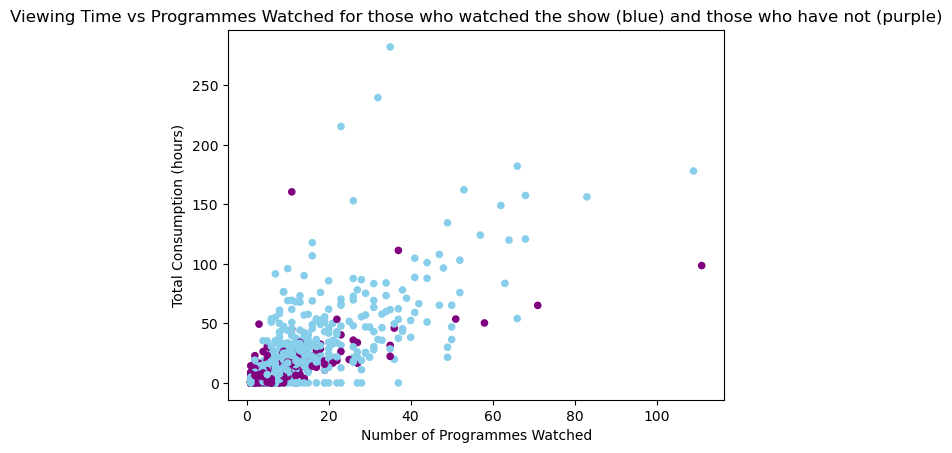

In [36]:
data[["n_programmes_watched", 'total_consumption_hours']].plot(kind = 'scatter', x = 'n_programmes_watched', y = 'total_consumption_hours',
            xlabel = 'Number of Programmes Watched',
            ylabel = 'Total Consumption (hours)',
            c = data["any_spy_among_friends_consumption"].map({True: 'skyblue', False: 'purple'}),
            title = 'Viewing Time vs Programmes Watched for those who watched the show (blue) and those who have not (purple)')

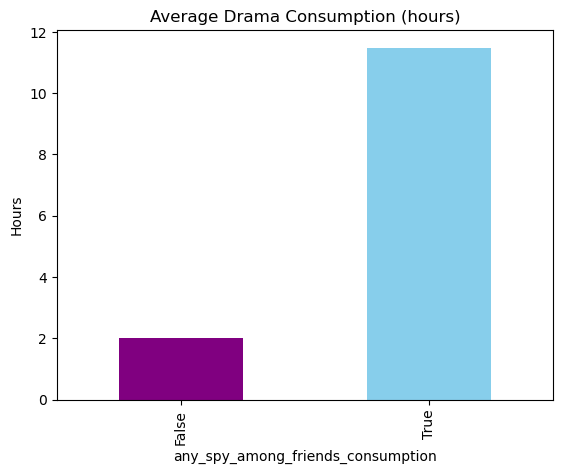

In [43]:
data['total_genre_drama_consumption_hours'] = data['total_genre_drama_consumption_seconds'] / 3600

import matplotlib.pyplot as plt
data.groupby('any_spy_among_friends_consumption')['total_genre_drama_consumption_hours'].mean().plot(kind = 'bar', color = ['purple', 'skyblue'])

plt.title('Average Drama Consumption (hours)')
plt.ylabel('Hours')
plt.show()

# Feature Engineering

Feature engineering is the process of using domain knowledge to create additional features (or variables) from the raw data that can be used to improve the performance of a model. It's like taking the raw data and making it more useful by creating new information from it. For example, if you are trying to predict the price of a house, instead of just using the number of bedrooms, you could create a new feature that calculates the number of bedrooms per square foot. The new feature captures the information in a more useful form and can help the model make more accurate predictions.

[Read more about this here](https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10).

When working with a machine learning model, it is important to consider the format of the input data. One common issue that arises is when dealing with categorical variables in string format. These variables may contain a large number of unique labels, making it difficult for the model to effectively process and utilize the information. To mitigate this, a common technique is to perform feature engineering on the categorical variable by reducing the number of unique labels.

In [218]:
data["top_3_genres_1"].value_counts()

top_3_genres_1
DRAMA            930
ENTERTAINMENT    469
SPORT            238
OTHER             44
FACTUAL           32
COMEDY            32
Name: count, dtype: int64

In [217]:
# we can for example extract what the top genre was
#data["top_genre_1"] = data["top_3_genres"].transform(lambda x: eval(x)[0] if x is not np.nan else np.nan)
#display(data[["top_3_genres", "top_genre_1"]])


KeyError: "None of [Index(['top_3_subgenres', 'top_subgenre_1'], dtype='object')] are in the [columns]"

<AxesSubplot:>

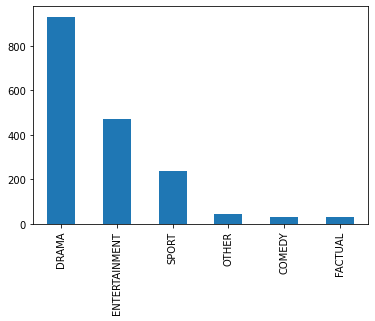

In [13]:
# now we have only 6 unique values
data["top_genre_1"].value_counts().plot(kind="bar")

<Axes: xlabel='top_3_genres_1'>

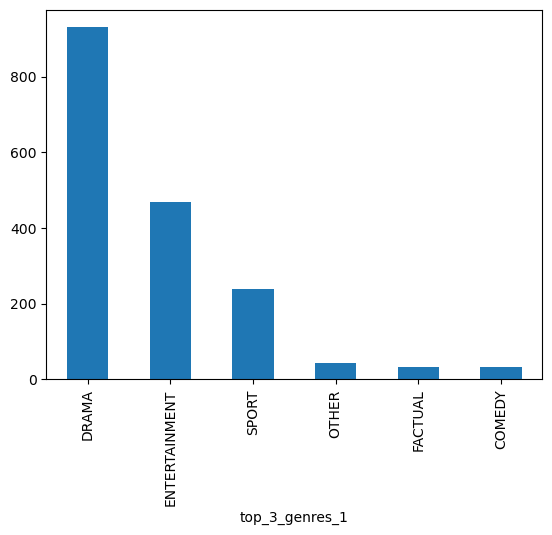

In [54]:
data['top_3_genres_1'].value_counts().plot(kind = 'bar')

In [91]:
data

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes_1,top_3_programmes_2,top_3_programmes_3,top_3_programmes_4,top_3_programmes_5,top_3_genres_1,top_3_genres_2,top_3_genres_3,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres_1,top_3_subgenres_2,top_3_subgenres_3,age,gender,mean_session_duration_seconds,episode_per_session,episodes_morning_h,episodes_afternoon_h,episodes_dinner_h,episodes_night_h,episodes_weekend_h,total_consumption_hours,consumption_per_device,mobile_viewing_session_h,desktop_viewing_session_h,TV_viewing_session_h
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,88,31,71,['WORLD CUP','CORONATION STREET','THE MOTORBIKE SHOW'],NaN,NaN,DRAMA,'FACTUAL','SPORT'],0.00,44740.84,14741.88,21813.69,3746.00,15194.38,7101.02,69.48,407.71,1325.93,974.73,20721.63,16172.92,54245.06,9097.18,68075.81,23937.70,8223.28,10.0,26210.93,100236.79,True,['LONG RUNNING DRAMA','FOOTBALL','EVENT'],30.0,Other,1139.054432,0.806818,0.081071,0.063274,0.212226,0.035591,0.102547,27.843553,2.784355,0.075561,0.025957,0.214886
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,13,5,7,['WITHOUT SIN','EMMERDALE','CORONATION STREET'],NaN,NaN,DRAMA,NaN,NaN,0.00,10650.88,0.00,0.00,0.00,0.00,908.95,0.00,0.00,0.00,0.00,0.00,7309.58,3341.30,0.00,10650.88,0.00,0.00,1.0,1561.35,10650.88,True,['CRIME AND THRILLER','LONG RUNNING DRAMA','CRIME'],33.0,Female,819.298462,0.538462,0.000000,0.290063,0.132591,0.000000,0.061958,2.958578,2.958578,0.000000,0.000000,0.227583
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,26,7,15,['WORLD CUP',"""I'M A CELEBRITY... GET ME OUT OF HERE!""",'LOVE ISLAND'],NaN,NaN,ENTERTAINMENT,'SPORT','DRAMA'],65.07,12189.13,11231.67,29174.26,0.00,0.00,4269.11,673.81,0.00,0.00,0.00,0.00,0.00,39088.83,13571.29,52660.12,0.00,0.00,1.0,7201.88,52660.12,True,['FOOTBALL','EVENT','CELEBRITY'],33.0,Male,2025.389231,0.576923,0.000000,0.000000,0.723867,0.251320,0.133368,14.627811,14.627811,0.000000,0.000000,0.562608
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,39,8,22,['A SPY AMONG FRIENDS','A CONFESSION','WITHOUT SIN'],NaN,NaN,DRAMA,'ENTERTAINMENT','OTHER'],0.00,78194.43,286.35,0.00,4.66,0.00,1132.38,0.00,2431.01,0.00,0.00,3012.44,13933.15,36104.81,25435.04,78485.44,0.00,0.00,2.0,0.00,78485.44,True,['CRIME AND THRILLER','BASED ON A TRUE STORY','CELEBRITY'],36.0,Prefer not to answer,2012.447179,0.564103,0.038036,0.175924,0.455869,0.321149,0.000000,21.801511,10.900756,0.000000,0.000000,0.559013
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,67,18,47,['WORLD CUP','FEARLESS','THE WALK-IN'],NaN,NaN,SPORT,'ENTERTAINMENT','DRAMA'],0.00,17670.60,11802.85,144107.09,0.00,3408.63,17672.76,0.00,0.00,0.00,0.00,18512.08,25081.57,108080.54,25314.97,0.00,0.00,0.00,1.0,70648.59,176989.17,True,['FOOTBALL','EVENT','CRIME AND THRILLER'],32.0,NaN,2641.629403,0.701493,0.109409,0.148236,0.638774,0.149616,0.417545,49.163658,49.163658,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=,19,10,18,['WORLD CUP',"""I'M A CELEBRITY... GET ME OUT OF HERE!""",'

We can combine two columns to get a new metric. For example, we can divide `total_consumption_seconds` by `n_sessions`, to get the average number of seconds per session.

In [96]:
data["mean_session_duration_seconds"] = data["total_consumption_seconds"] / data["n_sessions"]

data['episode_per_session'] = data['n_episodes_watched'] / data['n_sessions']

data['episodes_morning_h'] = (data['total_watch_morning_consumption_seconds'] / 3600) / data['n_episodes_watched'] 

data['episodes_afternoon_h'] = (data['total_watch_afternoon_consumption_seconds'] / 3600) / data['n_episodes_watched']

data['episodes_dinner_h'] = (data['total_watch_dinner_consumption_seconds'] / 3600) / data['n_episodes_watched']

data['episodes_night_h'] = (data['total_watch_night_consumption_seconds'] / 3600) / data['n_episodes_watched']

data['episodes_weekend_h'] = (data['total_weekend_consumption_seconds'] / 3600) / data['n_episodes_watched']

data['consumption_per_device'] = data['total_consumption_hours'] / data['n_devices_watched_on']

data["mobile_viewing_session_h"] = (data["total_platform_mobile_consumption_seconds"] / 3600) / data["n_sessions"]

data["desktop_viewing_session_h"] = (data["total_platform_desktop_consumption_seconds"] / 3600) / data["n_sessions"]

data["TV_viewing_session_h"] = (data["total_platform_tv_consumption_seconds"] / 3600) / data["n_sessions"]


display(data[['n_sessions', "n_devices_watched_on", 'total_consumption_seconds', "total_consumption_hours", 'episode_per_session', 'episodes_morning_h', 'episodes_afternoon_h', 'episodes_dinner_h', 'episodes_night_h', 'episodes_weekend_h', "consumption_per_device", 'mobile_viewing_session_h', 'desktop_viewing_session_h', 'TV_viewing_session_h']])



,n_sessions,n_devices_watched_on,total_consumption_seconds,total_consumption_hours,episode_per_session,episodes_morning_h,episodes_afternoon_h,episodes_dinner_h,episodes_night_h,episodes_weekend_h,consumption_per_device,mobile_viewing_session_h,desktop_viewing_session_h,TV_viewing_session_h
user_id,,,,,,,,,,,,,,
NaN,88,10.0,100236.79,27.843553,0.806818,0.081071,0.063274,0.212226,0.035591,0.102547,2.784355,0.075561,0.025957,0.214886
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,13,1.0,10650.88,2.958578,0.538462,0.000000,0.290063,0.132591,0.000000,0.061958,2.958578,0.000000,0.000000,0.227583
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,26,1.0,52660.12,14.627811,0.576923,0.000000,0.000000,0.723867,0.251320,0.133368,14.627811,0.000000,0.000000,0.562608
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,39,2.0,78485.44,21.801511,0.564103,0.038036,0.175924,0.455869,0.321149,0.000000,10.900756,0.000000,0.000000,0.559013
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,67,1.0,176989.17,49.163658,0.701493,0.109409,0.148236,0.638774,0.149616,0.417545,49.163658,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=,19,2.0,37779.83,10.494397,0.947368,0.000000,0.132186,0.246771,0.204065,0.105033,5.247199,0.000000,0.000000,0.552337
zkr6KprLNGHxaRrHPGs/vqgYEKetsunUyW+H7FXlgK4=,27,1.0,22751.18,6.319772,0.444444,0.000000,0.000000,0.129924,0.000000,0.011747,6.319772,0.000000,0.000000,0.234066
zoIyf1raNu8xfnF51ICqjJhiDDwmD1NIbXw3l65xSyo=,61,3.0,56815.31,15.782031,0.704918,0.010029,0.018787,0.154949,0.183260,0.268362,5.260677,0.258722,0.000000,0.000000


What are some effective methods for extracting meaningful insights from the columns of data? Do you see more opportunities to create new features by combining information from multiple columns? 

In [15]:
# TODO: perform some feature engineering yourself! 

## Data Cleaning
Data cleaning is the process of preparing data for analysis by removing or correcting errors, inconsistencies, and missing values. It is important to ensure accuracy of analysis and predictions. Examples include removing duplicate rows, fixing spelling mistakes, filling in missing values, and converting data into the correct format.

For example, removing missing values is important because many machine learning algorithms cannot handle missing values and will either produce an error or produce biased results. Additionally, missing values can skew statistical analyses and make it difficult to draw accurate conclusions from the data. Removing them can help to improve the accuracy and reliability of the results.

In [221]:
# by making a copy of the dataset, instead of overwriting it, we can easily go back and look at the original data as we work
data_cleaned = data
#data_cleaned

Lets see how many missing values we have

In [271]:
# checking for missing values
data_cleaned = pd.read_csv("mock_data.csv", encoding='mac_roman').set_index("user_id")
data_cleaned

data_cleaned['top_subgenre_1'] = data_cleaned['top_3_subgenres'].transform(lambda x: eval(x)[0] if x is not np.nan else np.nan)
display(data_cleaned[['top_3_subgenres', 'top_subgenre_1']])

,top_3_subgenres,top_subgenre_1
user_id,,
#ERROR!,"['LONG RUNNING DRAMA', 'FOOTBALL', 'EVENT']",LONG RUNNING DRAMA
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,"['CRIME AND THRILLER', 'LONG RUNNING DRAMA', '...",CRIME AND THRILLER
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,"['FOOTBALL', 'EVENT', 'CELEBRITY']",FOOTBALL
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,"['CRIME AND THRILLER', 'BASED ON A TRUE STORY'...",CRIME AND THRILLER
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,"['FOOTBALL', 'EVENT', 'CRIME AND THRILLER']",FOOTBALL
...,...,...
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=,"['FOOTBALL', 'EVENT', 'CELEBRITY']",FOOTBALL
zkr6KprLNGHxaRrHPGs/vqgYEKetsunUyW+H7FXlgK4=,"['CELEBRITY', 'FACTUAL', 'TRAVEL']",CELEBRITY
zoIyf1raNu8xfnF51ICqjJhiDDwmD1NIbXw3l65xSyo=,"['CELEBRITY', 'FOOTBALL', 'LONG RUNNING DRAMA']",CELEBRITY


In [272]:
data_cleaned['total_consumption_hours'] = data_cleaned['total_consumption_seconds'] / 3600

data_cleaned["mean_session_duration_seconds"] = data_cleaned["total_consumption_seconds"] / data_cleaned["n_sessions"]

data_cleaned['episode_per_session'] = data_cleaned['n_episodes_watched'] / data_cleaned['n_sessions']

data_cleaned['episodes_morning_h'] = (data_cleaned['total_watch_morning_consumption_seconds'] / 3600) / data_cleaned['n_episodes_watched'] 

data_cleaned['episodes_afternoon_h'] = (data_cleaned['total_watch_afternoon_consumption_seconds'] / 3600) / data_cleaned['n_episodes_watched']

data_cleaned['episodes_dinner_h'] = (data_cleaned['total_watch_dinner_consumption_seconds'] / 3600) / data_cleaned['n_episodes_watched']

data_cleaned['episodes_night_h'] = (data_cleaned['total_watch_night_consumption_seconds'] / 3600) / data_cleaned['n_episodes_watched']

data_cleaned['episodes_weekend_h'] = (data_cleaned['total_weekend_consumption_seconds'] / 3600) / data_cleaned['n_episodes_watched']

data_cleaned['consumption_per_device'] = data_cleaned['total_consumption_hours'] / data_cleaned['n_devices_watched_on']

data_cleaned["mobile_viewing_session_h"] = (data_cleaned["total_platform_mobile_consumption_seconds"] / 3600) / data_cleaned["n_sessions"]

data_cleaned["desktop_viewing_session_h"] = (data_cleaned["total_platform_desktop_consumption_seconds"] / 3600) / data_cleaned["n_sessions"]

data_cleaned["TV_viewing_session_h"] = (data_cleaned["total_platform_tv_consumption_seconds"] / 3600) / data_cleaned["n_sessions"]

display(data_cleaned[['n_sessions', "n_devices_watched_on", 'total_consumption_seconds', "total_consumption_hours", 'episode_per_session', 'episodes_morning_h', 'episodes_afternoon_h', 'episodes_dinner_h', 'episodes_night_h', 'episodes_weekend_h', "consumption_per_device", 'mobile_viewing_session_h', 'desktop_viewing_session_h', 'TV_viewing_session_h']])

,n_sessions,n_devices_watched_on,total_consumption_seconds,total_consumption_hours,episode_per_session,episodes_morning_h,episodes_afternoon_h,episodes_dinner_h,episodes_night_h,episodes_weekend_h,consumption_per_device,mobile_viewing_session_h,desktop_viewing_session_h,TV_viewing_session_h
user_id,,,,,,,,,,,,,,
#ERROR!,88,10.0,100236.786707,27.843552,0.806818,0.081071,0.063274,0.212226,0.035591,0.102547,2.784355,0.075561,0.025957,0.214886
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,13,1.0,10650.877000,2.958577,0.538462,0.000000,0.290063,0.132591,0.000000,0.061958,2.958577,0.000000,0.000000,0.227583
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,26,1.0,52660.124921,14.627812,0.576923,0.000000,0.000000,0.723867,0.251320,0.133368,14.627812,0.000000,0.000000,0.562608
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,39,2.0,78485.442042,21.801512,0.564103,0.038036,0.175924,0.455869,0.321149,0.000000,10.900756,0.000000,0.000000,0.559013
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,67,1.0,176989.167344,49.163658,0.701493,0.109409,0.148236,0.638774,0.149616,0.417545,49.163658,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=,19,2.0,37779.834473,10.494398,0.947368,0.000000,0.132186,0.246771,0.204065,0.105033,5.247199,0.000000,0.000000,0.552337
zkr6KprLNGHxaRrHPGs/vqgYEKetsunUyW+H7FXlgK4=,27,1.0,22751.175730,6.319771,0.444444,0.000000,0.000000,0.129924,NaN,0.011747,6.319771,0.000000,0.000000,0.234066
zoIyf1raNu8xfnF51ICqjJhiDDwmD1NIbXw3l65xSyo=,61,3.0,56815.310210,15.782031,0.704918,0.010029,0.018787,0.154948,0.183260,0.268362,5.260677,0.258722,0.000000,0.000000


There are a few columns in this dataset that contain missing values. One approach to handling missing data is to simply drop all rows that have any missing values. However, this can result in a significant loss of data, which can negatively impact the accuracy of the analysis.
Another approach is to attempt to replace the missing values with an estimate of what the value is likely to be.
For categorical variables such as top_genre_1, we might use the mode (most common value) of that column to fill in missing values.
For continuous variables, we might use the mean or median of that column to replace the missing values. Additionally, there are more advanced strategies such as using machine learning algorithms to predict missing values, which can be more accurate. It is important to consider the specific characteristics of the dataset and the goals of the analysis when deciding on the best approach for handling missing values.

You can see a few approaches in this [article](https://towardsdatascience.com/handling-missing-values-with-pandas-b876bf6f008f).

In [273]:
# in the top_genre_1 column we have a few missing values
data_cleaned["top_3_genres"].value_counts()
data_cleaned["top_genre_1"] = data_cleaned["top_3_genres"].transform(lambda x: eval(x)[0] if x is not np.nan else np.nan)

data_cleaned["top_genre_1"].isna().sum()

26

In [274]:
# As an example, below we are replacing missing values in top_genre_1 with 'DRAAMA' because most people in our dataset are male.
# to replace missing values, we'll use the pandas fillna method
#   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

fill_na_definition = {"top_genre_1": "DRAMA"}

data_cleaned.fillna(fill_na_definition, inplace=True)

print("\n Now - Number of missing values in top_genre_1 column: " + str(data_cleaned["top_genre_1"].isnull().sum()))


 Now - Number of missing values in top_genre_1 column: 0


In [275]:
data_cleaned.isna().sum()

n_sessions                                         0
n_programmes_watched                               0
n_episodes_watched                                 0
top_3_programmes                                   0
top_3_genres                                      26
total_genre_comedy_consumption_seconds             0
total_genre_drama_consumption_seconds              0
total_genre_entertainment_consumption_seconds      0
total_genre_sport_consumption_seconds              0
total_genre_other_consumption_seconds              0
total_genre_factual_consumption_seconds            0
total_channel_ITV_consumption_seconds              0
total_channel_ITV2_consumption_seconds             0
total_channel_ITV3_consumption_seconds             0
total_channel_ITVBe_consumption_seconds            0
total_channel_ITV4_consumption_seconds             0
total_watch_morning_consumption_seconds            0
total_watch_afternoon_consumption_seconds          0
total_watch_dinner_consumption_seconds        

In [276]:
# here we are imputing the mean_session_duration_seconds and total_genre_drama_consumption_seconds columns with the average
# we're also replacing total_consumption_seconds with the mode
avg_mean_session_duration_seconds = data_cleaned["mean_session_duration_seconds"].mean()
avg_drama_genre_consumption_seconds = data_cleaned["total_genre_drama_consumption_seconds"].mean()
avg_total_consumption_seconds = data_cleaned["total_consumption_seconds"].mode().iloc[0]

print(data_cleaned['total_consumption_seconds'].mode())
fill_na_definition = {"mean_session_duration_seconds": avg_mean_session_duration_seconds, 
                      "total_genre_drama_consumption_seconds": avg_drama_genre_consumption_seconds, 
                      "total_consumption_seconds": avg_total_consumption_seconds
}

data_cleaned.fillna(fill_na_definition, inplace=True)

print("\n Now - Number of missing values in mean_session_duration_seconds column: " + str(data_cleaned["mean_session_duration_seconds"].isnull().sum()))

print("\n Now - Number of missing values in total_genre_drama_consumption_seconds column: " + str(data_cleaned["total_genre_drama_consumption_seconds"].isnull().sum()))

print("\n Now - Number of missing values in total_consumption_seconds column: " + str(data_cleaned["total_consumption_seconds"].isnull().sum()))

print(data_cleaned['total_consumption_seconds'])

data_cleaned.isna().sum()


0       2.340000e-01
1       3.754794e-01
2       1.711357e+00
3       2.450000e+00
4       4.228000e+00
            ...     
1671    6.408415e+05
1672    6.555576e+05
1673    7.756492e+05
1674    8.626554e+05
1675    1.016244e+06
Name: total_consumption_seconds, Length: 1676, dtype: float64

 Now - Number of missing values in mean_session_duration_seconds column: 0

 Now - Number of missing values in total_genre_drama_consumption_seconds column: 0

 Now - Number of missing values in total_consumption_seconds column: 0
user_id
#ERROR!                                         100236.786707
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=     10650.877000
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=     52660.124921
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=     78485.442042
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=    176989.167344
                                                    ...      
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=     37779.834473
zkr6KprLNGHxaRrHPGs/vqgYEKetsunUy

n_sessions                                         0
n_programmes_watched                               0
n_episodes_watched                                 0
top_3_programmes                                   0
top_3_genres                                      26
total_genre_comedy_consumption_seconds             0
total_genre_drama_consumption_seconds              0
total_genre_entertainment_consumption_seconds      0
total_genre_sport_consumption_seconds              0
total_genre_other_consumption_seconds              0
total_genre_factual_consumption_seconds            0
total_channel_ITV_consumption_seconds              0
total_channel_ITV2_consumption_seconds             0
total_channel_ITV3_consumption_seconds             0
total_channel_ITVBe_consumption_seconds            0
total_channel_ITV4_consumption_seconds             0
total_watch_morning_consumption_seconds            0
total_watch_afternoon_consumption_seconds          0
total_watch_dinner_consumption_seconds        

Clean up the entire dataset to retain as much data as possible. This is important because more data means a better-performing model. However, it's important to be cautious and avoid making too many assumptions when cleaning the data. If the dataset becomes too far removed from reality, the model's performance will suffer when it encounters new data. Feel free to experiment with different columns and techniques to see how they affect the data.

In [277]:
# TODO: impute missing values on the other columns

most_watched_genre = data_cleaned['top_3_genres'].mode().iloc[0]
average_devices_watched_on = data_cleaned['n_devices_watched_on'].mode().iloc[0]
average_night_consumption = data_cleaned['total_watch_night_consumption_seconds'].median()
average_platform_tv_consumption = data_cleaned['total_platform_tv_consumption_seconds'].median()
average_consumption_hours = data_cleaned['total_consumption_hours'].median()
average_episodes_night_h = data_cleaned['episodes_night_h'].median()
average_consumption_device = data_cleaned['consumption_per_device'].median()
average_TV_session_h = data_cleaned['TV_viewing_session_h'].median()

fill_na_definition = {'top_3_genres': most_watched_genre,
                     'n_devices_watched_on': average_devices_watched_on,
                     'total_watch_night_consumption_seconds': average_night_consumption,
                     'total_platform_tv_consumption_seconds': average_platform_tv_consumption,
                     'total_consumption_hours': average_consumption_hours,
                     'episodes_night_h': average_episodes_night_h,
                     'consumption_per_device': average_consumption_device,
                     'TV_viewing_session_h': average_TV_session_h,
                     'age': 'Unknown',
                     'gender': 'Unknown'}

data_cleaned.fillna(fill_na_definition, inplace = True)
data_cleaned.isna().sum()

#print(data_cleaned['top_3_genres'].mode())
#print(average_devices_watched_on, average_night_consumption, average_platform_tv_consumption, average_consumption_hours, average_episodes_night_h, average_consumption_device, average_TV_session_h)



n_sessions                                       0
n_programmes_watched                             0
n_episodes_watched                               0
top_3_programmes                                 0
top_3_genres                                     0
total_genre_comedy_consumption_seconds           0
total_genre_drama_consumption_seconds            0
total_genre_entertainment_consumption_seconds    0
total_genre_sport_consumption_seconds            0
total_genre_other_consumption_seconds            0
total_genre_factual_consumption_seconds          0
total_channel_ITV_consumption_seconds            0
total_channel_ITV2_consumption_seconds           0
total_channel_ITV3_consumption_seconds           0
total_channel_ITVBe_consumption_seconds          0
total_channel_ITV4_consumption_seconds           0
total_watch_morning_consumption_seconds          0
total_watch_afternoon_consumption_seconds        0
total_watch_dinner_consumption_seconds           0
total_watch_night_consumption_s

Its not always possible to replace all missing values, so to delete the rows with missing values you can do this:

In [300]:
data_cleaned.dropna(inplace=True)
print("Are there any missing?:", data_cleaned.isna().sum().any())

Are there any missing?: False


## Encoding

Variable encoding is the process of converting categorical variables, which are variables that can take on a limited number of values, into numerical variables that can be used by machine learning algorithms. This is necessary because most machine learning algorithms only work with numerical data, and cannot directly process categorical data.
There are several different ways to encode categorical variables, such as one-hot encoding, label encoding, and binary encoding. Each encoding method has its own advantages and disadvantages, and the choice of which method to use depends on the specific characteristics of the dataset and the goals of the analysis. For example, One-hot encoding creates a new binary column for each unique category and assigns a 1 or 0 in each observation for the presence or absence of that category. Label encoding assigns a unique integer value to each category.
It is important to encode categorical variables correctly in order to ensure that the data is properly represented and that the machine learning model can make accurate predictions.

In [309]:
data_encoded = data_cleaned.copy()

data_encoded['n_devices_watched_on'].max()

10.0

In [310]:
# Lets first look at our target variable - this is what we're trying to predict
target_column = "any_spy_among_friends_consumption"

data_encoded[target_column]

user_id
#ERROR!                                          True
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=     True
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=     True
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=     True
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=     True
                                                ...  
zg9fzXtMG4auh6OAIgjr8syJkEv7UJm7L9tvvEbOYuY=     True
zkr6KprLNGHxaRrHPGs/vqgYEKetsunUyW+H7FXlgK4=    False
zoIyf1raNu8xfnF51ICqjJhiDDwmD1NIbXw3l65xSyo=    False
ztIVvNPSTAzd12wlEFHaI9lciI9lgHa5VJFxYgqfzOk=    False
zyikXJ6pnium8X6j2AB/pBDdU6UEQZfMQi0ncOMjgAw=    False
Name: any_spy_among_friends_consumption, Length: 1771, dtype: bool

This is a boolean data type: the value is either True or False.
To create a machine learning model, it might be easier to have this as a numerical value, lets convert the column to integer type instead to get 0s and 1s.

In [325]:
data_encoded[target_column] = data_encoded[target_column].astype(int)
display(data_encoded[target_column])

KeyError: 'any_spy_among_friends_consumption'

In [314]:
data_encoded

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,any_spy_among_friends_consumption,top_3_subgenres,age,gender,top_subgenre_1,total_consumption_hours,mean_session_duration_seconds,episode_per_session,episodes_morning_h,episodes_afternoon_h,episodes_dinner_h,episodes_night_h,episodes_weekend_h,consumption_per_device,mobile_viewing_session_h,desktop_viewing_session_h,TV_viewing_session_h,top_genre_1,top_3_subgenre_1
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
#ERROR!,88,31,71,"['WORLD CUP', 'CORONATION STREET', 'THE MOTORB...","['DRAMA', 'FACTUAL', 'SPORT']",0.000000,44740.836375,14741.881016,21813.686317,3746.000000,15194.383000,7101.018033,69.484000,407.710038,1325.9340,974.732600,20721.626539,16172.921061,54245.059108,9097.180000,68075.810754,23937.696359,8223.279594,10.0,26210.929569,100236.786707,1,"['LONG RUNNING DRAMA', 'FOOTBALL', 'EVENT']",30.0,Other,LONG RUNNING DRAMA,27.843552,1139.054394,0.806818,0.081071,0.063274,0.212226,0.035591,0.102547,2.784355,0.075561,0.025957,0.214886,DRAMA,LONG RUNNING DRAMA
+1FV4TIbF3C+E+1XgRBOO/qBstZGp0kwd+XnbMk1fzM=,13,5,7,"['WITHOUT SIN', 'EMMERDALE', 'CORONATION STREET']",['DRAMA'],0.000000,10650.877000,0.000000,0.000000,0.000000,0.000000,908.952400,0.000000,0.000000,0.0000,0.000000,0.000000,7309.580000,3341.297000,0.000000,10650.877000,0.000000,0.000000,1.0,1561.353000,10650.877000,1,"['CRIME AND THRILLER', 'LONG RUNNING DRAMA', '...",33.0,Female,CRIME AND THRILLER,2.958577,819.298231,0.538462,0.000000,0.290063,0.132591,0.000000,0.061958,2.958577,0.000000,0.000000,0.227583,DRAMA,CRIME AND THRILLER
+ApnntNc0A0YLwC2Op4liNRk2si/i9BWsLhUfeAd5PU=,26,7,15,"['WORLD CUP', ""I'M A CELEBRITY... GET ME OUT O...","['ENTERTAINMENT', 'SPORT', 'DRAMA']",65.067783,12189.135000,11231.665042,29174.257096,0.000000,0.000000,4269.113322,673.814170,0.000000,0.0000,0.000000,0.000000,0.000000,39088.831854,13571.293067,52660.124921,0.000000,0.000000,1.0,7201.881194,52660.124921,1,"['FOOTBALL', 'EVENT', 'CELEBRITY']",33.0,Male,FOOTBALL,14.627812,2025.389420,0.576923,0.000000,0.000000,0.723867,0.251320,0.133368,14.627812,0.000000,0.000000,0.562608,ENTERTAINMENT,FOOTBALL
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,39,8,22,"['A SPY AMONG FRIENDS', 'A CONFESSION', 'WITHO...","['DRAMA', 'ENTERTAINMENT', 'OTHER']",0.000000,78194.430000,286.353538,0.000000,4.658504,0.000000,1132.379704,0.000000,2431.011800,0.0000,0.000000,3012.440538,13933.152504,36104.811000,25435.038000,78485.442042,0.000000,0.000000,2.0,0.000000,78485.442042,1,"['CRIME AND THRILLER', 'BASED ON A TRUE STORY'...",36.0,Prefer not to answer,CRIME AND THRILLER,21.801512,2012.447232,0.564103,0.038036,0.175924,0.455869,0.321149,0.000000,10.900756,0.000000,0.000000,0.559013,DRAMA,CRIME AND THRILLER
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,67,18,47,"['WORLD CUP', 'FEARLESS', 'THE WALK-IN']","['SPORT', 'ENTERTAINMENT', 'DRAMA']",0.000000,17670.600000,11802.851738,144107.089606,0.000000,3408.626000,17672.755734,0.000000,0.000000,0.0000,0.000000,18512.082654,25081.574436,108080.543233,25314.967021,14666.015987,0.000000,0.000000,1.0,70648.591664,176989.167344,1,"['FOOTBALL', 'EVENT', 'CRIME AND THRILLER']",32.0,Unknown,FOOTBALL,49.163

The get_dummies method in the pandas library is used to convert categorical variables into numerical variables, specifically by creating a new binary column for each unique category and assigning a 1 or 0 in each observation for the presence or absence of that category. This is also known as one-hot encoding. [Read more here](https://datagy.io/pandas-get-dummies/)

In [315]:
# dummy encoding:
data_encoded = pd.get_dummies(data=data_encoded, columns = ['top_genre_1'])
data_encoded = pd.get_dummies(data = data_encoded, columns = ['any_spy_among_friends_consumption'])
data_encoded = pd.get_dummies(data = data_encoded, columns = ['gender'])

# in the top_genre_1 column we have a few missing values
data_cleaned["top_3_subgenres"].value_counts()
data_cleaned["top_3_subgenre_1"] = data_cleaned["top_3_subgenres"].transform(lambda x: eval(x)[0] if x is not np.nan else np.nan)
data_encoded = pd.get_dummies(data = data_encoded, columns = ['top_3_subgenre_1'])
#data_cleaned["top_subgenre_1"].isna().sum()

display(data_encoded)



# go have a look at the last columns which were just added. They are all binary!

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,top_3_subgenres,age,top_subgenre_1,total_consumption_hours,mean_session_duration_seconds,episode_per_session,episodes_morning_h,episodes_afternoon_h,episodes_dinner_h,episodes_night_h,episodes_weekend_h,consumption_per_device,mobile_viewing_session_h,desktop_viewing_session_h,TV_viewing_session_h,top_genre_1_COMEDY,top_genre_1_DRAMA,top_genre_1_ENTERTAINMENT,top_genre_1_FACTUAL,top_genre_1_OTHER,top_genre_1_SPORT,any_spy_among_friends_consumption_0,any_spy_among_friends_consumption_1,gender_Female,gender_Male,gender_Other,gender_Prefer not to answer,gender_Unknown,top_3_subgenre_1_ACTION AND ADVENTURE,top_3_subgenre_1_ADULT ANIMATION,top_3_subgenre_1_ALTERNATIVE COMEDY,top_3_subgenre_1_ANIMATION,top_3_subgenre_1_BASED ON A TRUE STORY,top_3_subgenre_1_BUSINESS AND CONSUMER,top_3_subgenre_1_CELEBRITY,top_3_subgenre_1_CHAT AND MAGAZINE,top_3_subgenre_1_COMEDY,top_3_subgenre_1_COMING OF AGE THEME,top_3_subgenre_1_CONTEMPORARY BRITISH,top_3_subgenre_1_CRIME,top_3_subgenre_1_CRIME AND THRILLER,top_3_subgenre_1_CRIME DOCUMENTARY,top_3_subgenre_1_CURRENT AFFAIRS,top_3_subgenre_1_DARTS,top_3_subgenre_1_DATING SHOWS,top_3_subgenre_1_DOCUMENTARY,top_3_subgenre_1_DRAMA,top_3_subgenre_1_ENTERTAINMENT,top_3_subgenre_1_EVENT,top_3_subgenre_1_FACTUAL,top_3_subgenre_1_FAMILY,top_3_subgenre_1_FOOTBALL,top_3_subgenre_1_HOBBIES AND INTERESTS,top_3_subgenre_1_HORSE RACING,top_3_subgenre_1_LONG RUNNING DRAMA,top_3_subgenre_1_MOTOR SPORT,top_3_subgenre_1_MUSIC PROGRAMMES,top_3_subgenre_1_MUSICALS,top_3_subgenre_1_PERIOD,top_3_subgenre_1_PERIOD AND HISTORICAL,top_3_subgenre_1_QUIZ AND GAME SHOWS,top_3_subgenre_1_REAL LIVES,top_3_subgenre_1_REALITY,top_3_subgenre_1_ROMANTIC,top_3_subgenre_1_RUGBY UNION,top_3_subgenre_1_SCIENCE FICTION,top_3_subgenre_1_SCIENCE FICTION AND FANTASY,top_3_subgenre_1_SCRIPTED FACTUAL,top_3_subgenre_1_SITUATION COMEDY,top_3_subgenre_1_SOCIAL DRAMA,top_3_subgenre_1_SOCIAL REALISM,top_3_subgenre_1_SPORT,top_3_subgenre_1_TALENT SHOWS,top_3_subgenre_1_THRILLER,top_3_subgenre_1_TRAVEL,top_3_subgenre_1_TRUE CRIME,top_3_subgenre_1_TRUE STORY,top_3_subgenre_1_WAR,top_3_subgenre_1_WILDLIFE AND ENVIRONMENT,top_3_subgenre_1_WRESTLING
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
#ERROR!,88,31,71,"['WORLD CUP', 'CORONATION STREET', 'THE MOTORB...","['DRAMA', 'FACTUAL', 'SPORT']",0.000000,44740.836375,14741.881016,21813.686317,3746.000000,15194.383000,7101.018033,69.484000,407.710038,1325.9340,974.732600,20721.626539,16172.921061,54245.059108,9097.180000,68075.810754,23937.696359,8223.279594,10.0,26210.929569,100236.786707,"['LONG RUNNING DRAMA', 'FOOTBALL', 'EVENT']",30.0,LONG RUNNING DRAMA,27.843552,1139.054394,0.806818,0.081071,0.063274,0.212226,0.035591,0.102547,2.784355,0.075561,0.025957,0.214886,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [307]:
display(data_encoded['any_spy_among_friends_consumption'])

KeyError: 'any_spy_among_friends_consumption'

In [316]:
# TODO: encode any other categorical columns youd like to include in the model
column_1 = 'gender'
#data_encoded[column_1] = data_encoded[column_1].astype(int)
#data_encoded = pd.get_dummies(data = data_encoded, columns = ['gender'])
#display(data_encoded[target_column])
data_encoded = pd.get_dummies(data=data_encoded, columns=["top_subgenre_1"])

display(data_encoded)

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,top_3_subgenres,age,total_consumption_hours,mean_session_duration_seconds,episode_per_session,episodes_morning_h,episodes_afternoon_h,episodes_dinner_h,episodes_night_h,episodes_weekend_h,consumption_per_device,mobile_viewing_session_h,desktop_viewing_session_h,TV_viewing_session_h,top_genre_1_COMEDY,top_genre_1_DRAMA,top_genre_1_ENTERTAINMENT,top_genre_1_FACTUAL,top_genre_1_OTHER,top_genre_1_SPORT,any_spy_among_friends_consumption_0,any_spy_among_friends_consumption_1,gender_Female,gender_Male,gender_Other,gender_Prefer not to answer,gender_Unknown,top_3_subgenre_1_ACTION AND ADVENTURE,top_3_subgenre_1_ADULT ANIMATION,top_3_subgenre_1_ALTERNATIVE COMEDY,top_3_subgenre_1_ANIMATION,top_3_subgenre_1_BASED ON A TRUE STORY,top_3_subgenre_1_BUSINESS AND CONSUMER,top_3_subgenre_1_CELEBRITY,top_3_subgenre_1_CHAT AND MAGAZINE,top_3_subgenre_1_COMEDY,top_3_subgenre_1_COMING OF AGE THEME,top_3_subgenre_1_CONTEMPORARY BRITISH,top_3_subgenre_1_CRIME,top_3_subgenre_1_CRIME AND THRILLER,top_3_subgenre_1_CRIME DOCUMENTARY,top_3_subgenre_1_CURRENT AFFAIRS,top_3_subgenre_1_DARTS,top_3_subgenre_1_DATING SHOWS,top_3_subgenre_1_DOCUMENTARY,top_3_subgenre_1_DRAMA,top_3_subgenre_1_ENTERTAINMENT,top_3_subgenre_1_EVENT,top_3_subgenre_1_FACTUAL,top_3_subgenre_1_FAMILY,top_3_subgenre_1_FOOTBALL,top_3_subgenre_1_HOBBIES AND INTERESTS,top_3_subgenre_1_HORSE RACING,top_3_subgenre_1_LONG RUNNING DRAMA,top_3_subgenre_1_MOTOR SPORT,top_3_subgenre_1_MUSIC PROGRAMMES,top_3_subgenre_1_MUSICALS,top_3_subgenre_1_PERIOD,top_3_subgenre_1_PERIOD AND HISTORICAL,top_3_subgenre_1_QUIZ AND GAME SHOWS,top_3_subgenre_1_REAL LIVES,top_3_subgenre_1_REALITY,top_3_subgenre_1_ROMANTIC,top_3_subgenre_1_RUGBY UNION,top_3_subgenre_1_SCIENCE FICTION,top_3_subgenre_1_SCIENCE FICTION AND FANTASY,top_3_subgenre_1_SCRIPTED FACTUAL,top_3_subgenre_1_SITUATION COMEDY,top_3_subgenre_1_SOCIAL DRAMA,top_3_subgenre_1_SOCIAL REALISM,top_3_subgenre_1_SPORT,top_3_subgenre_1_TALENT SHOWS,top_3_subgenre_1_THRILLER,top_3_subgenre_1_TRAVEL,top_3_subgenre_1_TRUE CRIME,top_3_subgenre_1_TRUE STORY,top_3_subgenre_1_WAR,top_3_subgenre_1_WILDLIFE AND ENVIRONMENT,top_3_subgenre_1_WRESTLING,top_subgenre_1_ACTION AND ADVENTURE,top_subgenre_1_ADULT ANIMATION,top_subgenre_1_ALTERNATIVE COMEDY,top_subgenre_1_ANIMATION,top_subgenre_1_BASED ON A TRUE STORY,top_subgenre_1_BUSINESS AND CONSUMER,top_subgenre_1_CELEBRITY,top_subgenre_1_CHAT AND MAGAZINE,top_subgenre_1_COMEDY,top_subgenre_1_COMING OF AGE THEME,top_subgenre_1_CONTEMPORARY BRITISH,top_subgenre_1_CRIME,top_subgenre_1_CRIME AND THRILLER,top_subgenre_1_CRIME DOCUMENTARY,top_subgenre_1_CURRENT AFFAIRS,top_subgenre_1_DARTS,top_subgenre_1_DATING SHOWS,top_subgenre_1_DOCUMENTARY,top_subgenre_1_DRAMA,top_subgenre_1_ENTERTAINMENT,top_subgenre_1_EVENT,top_subgenre_1_FACTUAL,top_subgenre_1_FAMILY,top_subgenre_1_FOOTBALL,top_subgenre_1_HOBBIES AND INTERESTS,top_subgenre_1_HORSE RACING,top_subgenre_1_LONG RUNNING DRAMA,top_subgenre_1_MOTOR SPORT,top_subgenre_1_MUSIC PROGRAMMES,top_subgenre_1_MUSICALS,top_subgenre_1_PERIOD,top_subgenre_1_PERIOD AND HISTORICAL,top_subgenre_1_QUIZ AND GAME SHOWS,top_subgen

In [317]:
def bin_devices(x):
    if x == 1: return '1_device'
    elif 2 <= x <= 3: return '2_to_3_devices'
    elif 4 <= x <= 6: return '4_to_6_devices'
    else: return '7_plus_devices'

data_encoded['device_group'] = data_encoded['n_devices_watched_on'].apply(bin_devices)
#display(data_encoded[['n_devices_watched_on', 'device_group']].head())

data_encoded = pd.get_dummies(data = data_encoded, columns = ['device_group'], prefix = 'device')
display(data_encoded)


,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,top_3_subgenres,age,total_consumption_hours,mean_session_duration_seconds,episode_per_session,episodes_morning_h,episodes_afternoon_h,episodes_dinner_h,episodes_night_h,episodes_weekend_h,consumption_per_device,mobile_viewing_session_h,desktop_viewing_session_h,TV_viewing_session_h,top_genre_1_COMEDY,top_genre_1_DRAMA,top_genre_1_ENTERTAINMENT,top_genre_1_FACTUAL,top_genre_1_OTHER,top_genre_1_SPORT,any_spy_among_friends_consumption_0,any_spy_among_friends_consumption_1,gender_Female,gender_Male,gender_Other,gender_Prefer not to answer,gender_Unknown,top_3_subgenre_1_ACTION AND ADVENTURE,top_3_subgenre_1_ADULT ANIMATION,top_3_subgenre_1_ALTERNATIVE COMEDY,top_3_subgenre_1_ANIMATION,top_3_subgenre_1_BASED ON A TRUE STORY,top_3_subgenre_1_BUSINESS AND CONSUMER,top_3_subgenre_1_CELEBRITY,top_3_subgenre_1_CHAT AND MAGAZINE,top_3_subgenre_1_COMEDY,top_3_subgenre_1_COMING OF AGE THEME,top_3_subgenre_1_CONTEMPORARY BRITISH,top_3_subgenre_1_CRIME,top_3_subgenre_1_CRIME AND THRILLER,top_3_subgenre_1_CRIME DOCUMENTARY,top_3_subgenre_1_CURRENT AFFAIRS,top_3_subgenre_1_DARTS,top_3_subgenre_1_DATING SHOWS,top_3_subgenre_1_DOCUMENTARY,top_3_subgenre_1_DRAMA,top_3_subgenre_1_ENTERTAINMENT,top_3_subgenre_1_EVENT,top_3_subgenre_1_FACTUAL,top_3_subgenre_1_FAMILY,top_3_subgenre_1_FOOTBALL,top_3_subgenre_1_HOBBIES AND INTERESTS,top_3_subgenre_1_HORSE RACING,top_3_subgenre_1_LONG RUNNING DRAMA,top_3_subgenre_1_MOTOR SPORT,top_3_subgenre_1_MUSIC PROGRAMMES,top_3_subgenre_1_MUSICALS,top_3_subgenre_1_PERIOD,top_3_subgenre_1_PERIOD AND HISTORICAL,top_3_subgenre_1_QUIZ AND GAME SHOWS,top_3_subgenre_1_REAL LIVES,top_3_subgenre_1_REALITY,top_3_subgenre_1_ROMANTIC,top_3_subgenre_1_RUGBY UNION,top_3_subgenre_1_SCIENCE FICTION,top_3_subgenre_1_SCIENCE FICTION AND FANTASY,top_3_subgenre_1_SCRIPTED FACTUAL,top_3_subgenre_1_SITUATION COMEDY,top_3_subgenre_1_SOCIAL DRAMA,top_3_subgenre_1_SOCIAL REALISM,top_3_subgenre_1_SPORT,top_3_subgenre_1_TALENT SHOWS,top_3_subgenre_1_THRILLER,top_3_subgenre_1_TRAVEL,top_3_subgenre_1_TRUE CRIME,top_3_subgenre_1_TRUE STORY,top_3_subgenre_1_WAR,top_3_subgenre_1_WILDLIFE AND ENVIRONMENT,top_3_subgenre_1_WRESTLING,top_subgenre_1_ACTION AND ADVENTURE,top_subgenre_1_ADULT ANIMATION,top_subgenre_1_ALTERNATIVE COMEDY,top_subgenre_1_ANIMATION,top_subgenre_1_BASED ON A TRUE STORY,top_subgenre_1_BUSINESS AND CONSUMER,top_subgenre_1_CELEBRITY,top_subgenre_1_CHAT AND MAGAZINE,top_subgenre_1_COMEDY,top_subgenre_1_COMING OF AGE THEME,top_subgenre_1_CONTEMPORARY BRITISH,top_subgenre_1_CRIME,top_subgenre_1_CRIME AND THRILLER,top_subgenre_1_CRIME DOCUMENTARY,top_subgenre_1_CURRENT AFFAIRS,top_subgenre_1_DARTS,top_subgenre_1_DATING SHOWS,top_subgenre_1_DOCUMENTARY,top_subgenre_1_DRAMA,top_subgenre_1_ENTERTAINMENT,top_subgenre_1_EVENT,top_subgenre_1_FACTUAL,top_subgenre_1_FAMILY,top_subgenre_1_FOOTBALL,top_subgenre_1_HOBBIES AND INTERESTS,top_subgenre_1_HORSE RACING,top_subgenre_1_LONG RUNNING DRAMA,top_subgenre_1_MOTOR SPORT,top_subgenre_1_MUSIC PROGRAMMES,top_subgenre_1_MUSICALS,top_subgenre_1_PERIOD,top_subgenre_1_PERIOD AND HISTORICAL,top_subgenre_1_QUIZ AND GAME SHOWS,top_subgen

In [318]:
def clean_age(x):
    try: 
        return float(x)
    except: 
        return 'unknown' 

data_encoded['age_clean'] = data_encoded['age'].apply(clean_age)

def bin_age(x):
    if isinstance(x, str):
        return 'unknown'
    if 18 <= x <= 24: return '18_24'
    elif 25 <= x <= 34: return '25_34'
    elif 35 <= x <= 44: return '35-44'
    elif 45 <= x <= 50: return '45_50'
    else: return 'unknown'

data_encoded['age_group'] = data_encoded['age_clean'].apply(bin_age)
data_encoded = pd.get_dummies(data = data_encoded, columns = ['age_group'], prefix = 'age')

data_encoded

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,top_3_subgenres,age,total_consumption_hours,mean_session_duration_seconds,episode_per_session,episodes_morning_h,episodes_afternoon_h,episodes_dinner_h,episodes_night_h,episodes_weekend_h,consumption_per_device,mobile_viewing_session_h,desktop_viewing_session_h,TV_viewing_session_h,top_genre_1_COMEDY,top_genre_1_DRAMA,top_genre_1_ENTERTAINMENT,top_genre_1_FACTUAL,top_genre_1_OTHER,top_genre_1_SPORT,any_spy_among_friends_consumption_0,any_spy_among_friends_consumption_1,gender_Female,gender_Male,gender_Other,gender_Prefer not to answer,gender_Unknown,top_3_subgenre_1_ACTION AND ADVENTURE,top_3_subgenre_1_ADULT ANIMATION,top_3_subgenre_1_ALTERNATIVE COMEDY,top_3_subgenre_1_ANIMATION,top_3_subgenre_1_BASED ON A TRUE STORY,top_3_subgenre_1_BUSINESS AND CONSUMER,top_3_subgenre_1_CELEBRITY,top_3_subgenre_1_CHAT AND MAGAZINE,top_3_subgenre_1_COMEDY,top_3_subgenre_1_COMING OF AGE THEME,top_3_subgenre_1_CONTEMPORARY BRITISH,top_3_subgenre_1_CRIME,top_3_subgenre_1_CRIME AND THRILLER,top_3_subgenre_1_CRIME DOCUMENTARY,top_3_subgenre_1_CURRENT AFFAIRS,top_3_subgenre_1_DARTS,top_3_subgenre_1_DATING SHOWS,top_3_subgenre_1_DOCUMENTARY,top_3_subgenre_1_DRAMA,top_3_subgenre_1_ENTERTAINMENT,top_3_subgenre_1_EVENT,top_3_subgenre_1_FACTUAL,top_3_subgenre_1_FAMILY,top_3_subgenre_1_FOOTBALL,top_3_subgenre_1_HOBBIES AND INTERESTS,top_3_subgenre_1_HORSE RACING,top_3_subgenre_1_LONG RUNNING DRAMA,top_3_subgenre_1_MOTOR SPORT,top_3_subgenre_1_MUSIC PROGRAMMES,top_3_subgenre_1_MUSICALS,top_3_subgenre_1_PERIOD,top_3_subgenre_1_PERIOD AND HISTORICAL,top_3_subgenre_1_QUIZ AND GAME SHOWS,top_3_subgenre_1_REAL LIVES,top_3_subgenre_1_REALITY,top_3_subgenre_1_ROMANTIC,top_3_subgenre_1_RUGBY UNION,top_3_subgenre_1_SCIENCE FICTION,top_3_subgenre_1_SCIENCE FICTION AND FANTASY,top_3_subgenre_1_SCRIPTED FACTUAL,top_3_subgenre_1_SITUATION COMEDY,top_3_subgenre_1_SOCIAL DRAMA,top_3_subgenre_1_SOCIAL REALISM,top_3_subgenre_1_SPORT,top_3_subgenre_1_TALENT SHOWS,top_3_subgenre_1_THRILLER,top_3_subgenre_1_TRAVEL,top_3_subgenre_1_TRUE CRIME,top_3_subgenre_1_TRUE STORY,top_3_subgenre_1_WAR,top_3_subgenre_1_WILDLIFE AND ENVIRONMENT,top_3_subgenre_1_WRESTLING,top_subgenre_1_ACTION AND ADVENTURE,top_subgenre_1_ADULT ANIMATION,top_subgenre_1_ALTERNATIVE COMEDY,top_subgenre_1_ANIMATION,top_subgenre_1_BASED ON A TRUE STORY,top_subgenre_1_BUSINESS AND CONSUMER,top_subgenre_1_CELEBRITY,top_subgenre_1_CHAT AND MAGAZINE,top_subgenre_1_COMEDY,top_subgenre_1_COMING OF AGE THEME,top_subgenre_1_CONTEMPORARY BRITISH,top_subgenre_1_CRIME,top_subgenre_1_CRIME AND THRILLER,top_subgenre_1_CRIME DOCUMENTARY,top_subgenre_1_CURRENT AFFAIRS,top_subgenre_1_DARTS,top_subgenre_1_DATING SHOWS,top_subgenre_1_DOCUMENTARY,top_subgenre_1_DRAMA,top_subgenre_1_ENTERTAINMENT,top_subgenre_1_EVENT,top_subgenre_1_FACTUAL,top_subgenre_1_FAMILY,top_subgenre_1_FOOTBALL,top_subgenre_1_HOBBIES AND INTERESTS,top_subgenre_1_HORSE RACING,top_subgenre_1_LONG RUNNING DRAMA,top_subgenre_1_MOTOR SPORT,top_subgenre_1_MUSIC PROGRAMMES,top_subgenre_1_MUSICALS,top_subgenre_1_PERIOD,top_subgenre_1_PERIOD AND HISTORICAL,top_subgenre_1_QUIZ AND GAME SHOWS,top_subgen

In [319]:
def get_time_pref(row):
    times = {
        'morning': row['total_watch_morning_consumption_seconds'],
        'afternoon': row['total_watch_afternoon_consumption_seconds'],
        'dinner': row['total_watch_dinner_consumption_seconds'],
        'night': row['total_watch_night_consumption_seconds'],
        'weekend': row['total_weekend_consumption_seconds']
    }
    return max(times, key=times.get)

data_encoded['time_pref_raw'] = data_encoded.apply(get_time_pref, axis = 1)

def map_time_pref(x):
    if x == 'morning': 
        return 'morning'
    elif x == 'afternoon': 
        return 'afternoon'
    elif x in ['dinner', 'night']: 
        return 'dinner_night'
    else: return 'weekend'

data_encoded['time_pref'] = data_encoded['time_pref_raw'].apply(map_time_pref)
data_encoded = pd.get_dummies(data = data_encoded, columns = ['time_pref'], prefix = 'time')

data_encoded

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,top_3_subgenres,age,total_consumption_hours,mean_session_duration_seconds,episode_per_session,episodes_morning_h,episodes_afternoon_h,episodes_dinner_h,episodes_night_h,episodes_weekend_h,consumption_per_device,mobile_viewing_session_h,desktop_viewing_session_h,TV_viewing_session_h,top_genre_1_COMEDY,top_genre_1_DRAMA,top_genre_1_ENTERTAINMENT,top_genre_1_FACTUAL,top_genre_1_OTHER,top_genre_1_SPORT,any_spy_among_friends_consumption_0,any_spy_among_friends_consumption_1,gender_Female,gender_Male,gender_Other,gender_Prefer not to answer,gender_Unknown,top_3_subgenre_1_ACTION AND ADVENTURE,top_3_subgenre_1_ADULT ANIMATION,top_3_subgenre_1_ALTERNATIVE COMEDY,top_3_subgenre_1_ANIMATION,top_3_subgenre_1_BASED ON A TRUE STORY,top_3_subgenre_1_BUSINESS AND CONSUMER,top_3_subgenre_1_CELEBRITY,top_3_subgenre_1_CHAT AND MAGAZINE,top_3_subgenre_1_COMEDY,top_3_subgenre_1_COMING OF AGE THEME,top_3_subgenre_1_CONTEMPORARY BRITISH,top_3_subgenre_1_CRIME,top_3_subgenre_1_CRIME AND THRILLER,top_3_subgenre_1_CRIME DOCUMENTARY,top_3_subgenre_1_CURRENT AFFAIRS,top_3_subgenre_1_DARTS,top_3_subgenre_1_DATING SHOWS,top_3_subgenre_1_DOCUMENTARY,top_3_subgenre_1_DRAMA,top_3_subgenre_1_ENTERTAINMENT,top_3_subgenre_1_EVENT,top_3_subgenre_1_FACTUAL,top_3_subgenre_1_FAMILY,top_3_subgenre_1_FOOTBALL,top_3_subgenre_1_HOBBIES AND INTERESTS,top_3_subgenre_1_HORSE RACING,top_3_subgenre_1_LONG RUNNING DRAMA,top_3_subgenre_1_MOTOR SPORT,top_3_subgenre_1_MUSIC PROGRAMMES,top_3_subgenre_1_MUSICALS,top_3_subgenre_1_PERIOD,top_3_subgenre_1_PERIOD AND HISTORICAL,top_3_subgenre_1_QUIZ AND GAME SHOWS,top_3_subgenre_1_REAL LIVES,top_3_subgenre_1_REALITY,top_3_subgenre_1_ROMANTIC,top_3_subgenre_1_RUGBY UNION,top_3_subgenre_1_SCIENCE FICTION,top_3_subgenre_1_SCIENCE FICTION AND FANTASY,top_3_subgenre_1_SCRIPTED FACTUAL,top_3_subgenre_1_SITUATION COMEDY,top_3_subgenre_1_SOCIAL DRAMA,top_3_subgenre_1_SOCIAL REALISM,top_3_subgenre_1_SPORT,top_3_subgenre_1_TALENT SHOWS,top_3_subgenre_1_THRILLER,top_3_subgenre_1_TRAVEL,top_3_subgenre_1_TRUE CRIME,top_3_subgenre_1_TRUE STORY,top_3_subgenre_1_WAR,top_3_subgenre_1_WILDLIFE AND ENVIRONMENT,top_3_subgenre_1_WRESTLING,top_subgenre_1_ACTION AND ADVENTURE,top_subgenre_1_ADULT ANIMATION,top_subgenre_1_ALTERNATIVE COMEDY,top_subgenre_1_ANIMATION,top_subgenre_1_BASED ON A TRUE STORY,top_subgenre_1_BUSINESS AND CONSUMER,top_subgenre_1_CELEBRITY,top_subgenre_1_CHAT AND MAGAZINE,top_subgenre_1_COMEDY,top_subgenre_1_COMING OF AGE THEME,top_subgenre_1_CONTEMPORARY BRITISH,top_subgenre_1_CRIME,top_subgenre_1_CRIME AND THRILLER,top_subgenre_1_CRIME DOCUMENTARY,top_subgenre_1_CURRENT AFFAIRS,top_subgenre_1_DARTS,top_subgenre_1_DATING SHOWS,top_subgenre_1_DOCUMENTARY,top_subgenre_1_DRAMA,top_subgenre_1_ENTERTAINMENT,top_subgenre_1_EVENT,top_subgenre_1_FACTUAL,top_subgenre_1_FAMILY,top_subgenre_1_FOOTBALL,top_subgenre_1_HOBBIES AND INTERESTS,top_subgenre_1_HORSE RACING,top_subgenre_1_LONG RUNNING DRAMA,top_subgenre_1_MOTOR SPORT,top_subgenre_1_MUSIC PROGRAMMES,top_subgenre_1_MUSICALS,top_subgenre_1_PERIOD,top_subgenre_1_PERIOD AND HISTORICAL,top_subgenre_1_QUIZ AND GAME SHOWS,top_subgen

## Standardising
Another important aspect to think about is whether each row of data is comparable. Take for example  `total_genre_drama_consumption_seconds`. 

In [320]:
data_standardised = data_encoded.copy()
data_standardised

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,top_3_subgenres,age,total_consumption_hours,mean_session_duration_seconds,episode_per_session,episodes_morning_h,episodes_afternoon_h,episodes_dinner_h,episodes_night_h,episodes_weekend_h,consumption_per_device,mobile_viewing_session_h,desktop_viewing_session_h,TV_viewing_session_h,top_genre_1_COMEDY,top_genre_1_DRAMA,top_genre_1_ENTERTAINMENT,top_genre_1_FACTUAL,top_genre_1_OTHER,top_genre_1_SPORT,any_spy_among_friends_consumption_0,any_spy_among_friends_consumption_1,gender_Female,gender_Male,gender_Other,gender_Prefer not to answer,gender_Unknown,top_3_subgenre_1_ACTION AND ADVENTURE,top_3_subgenre_1_ADULT ANIMATION,top_3_subgenre_1_ALTERNATIVE COMEDY,top_3_subgenre_1_ANIMATION,top_3_subgenre_1_BASED ON A TRUE STORY,top_3_subgenre_1_BUSINESS AND CONSUMER,top_3_subgenre_1_CELEBRITY,top_3_subgenre_1_CHAT AND MAGAZINE,top_3_subgenre_1_COMEDY,top_3_subgenre_1_COMING OF AGE THEME,top_3_subgenre_1_CONTEMPORARY BRITISH,top_3_subgenre_1_CRIME,top_3_subgenre_1_CRIME AND THRILLER,top_3_subgenre_1_CRIME DOCUMENTARY,top_3_subgenre_1_CURRENT AFFAIRS,top_3_subgenre_1_DARTS,top_3_subgenre_1_DATING SHOWS,top_3_subgenre_1_DOCUMENTARY,top_3_subgenre_1_DRAMA,top_3_subgenre_1_ENTERTAINMENT,top_3_subgenre_1_EVENT,top_3_subgenre_1_FACTUAL,top_3_subgenre_1_FAMILY,top_3_subgenre_1_FOOTBALL,top_3_subgenre_1_HOBBIES AND INTERESTS,top_3_subgenre_1_HORSE RACING,top_3_subgenre_1_LONG RUNNING DRAMA,top_3_subgenre_1_MOTOR SPORT,top_3_subgenre_1_MUSIC PROGRAMMES,top_3_subgenre_1_MUSICALS,top_3_subgenre_1_PERIOD,top_3_subgenre_1_PERIOD AND HISTORICAL,top_3_subgenre_1_QUIZ AND GAME SHOWS,top_3_subgenre_1_REAL LIVES,top_3_subgenre_1_REALITY,top_3_subgenre_1_ROMANTIC,top_3_subgenre_1_RUGBY UNION,top_3_subgenre_1_SCIENCE FICTION,top_3_subgenre_1_SCIENCE FICTION AND FANTASY,top_3_subgenre_1_SCRIPTED FACTUAL,top_3_subgenre_1_SITUATION COMEDY,top_3_subgenre_1_SOCIAL DRAMA,top_3_subgenre_1_SOCIAL REALISM,top_3_subgenre_1_SPORT,top_3_subgenre_1_TALENT SHOWS,top_3_subgenre_1_THRILLER,top_3_subgenre_1_TRAVEL,top_3_subgenre_1_TRUE CRIME,top_3_subgenre_1_TRUE STORY,top_3_subgenre_1_WAR,top_3_subgenre_1_WILDLIFE AND ENVIRONMENT,top_3_subgenre_1_WRESTLING,top_subgenre_1_ACTION AND ADVENTURE,top_subgenre_1_ADULT ANIMATION,top_subgenre_1_ALTERNATIVE COMEDY,top_subgenre_1_ANIMATION,top_subgenre_1_BASED ON A TRUE STORY,top_subgenre_1_BUSINESS AND CONSUMER,top_subgenre_1_CELEBRITY,top_subgenre_1_CHAT AND MAGAZINE,top_subgenre_1_COMEDY,top_subgenre_1_COMING OF AGE THEME,top_subgenre_1_CONTEMPORARY BRITISH,top_subgenre_1_CRIME,top_subgenre_1_CRIME AND THRILLER,top_subgenre_1_CRIME DOCUMENTARY,top_subgenre_1_CURRENT AFFAIRS,top_subgenre_1_DARTS,top_subgenre_1_DATING SHOWS,top_subgenre_1_DOCUMENTARY,top_subgenre_1_DRAMA,top_subgenre_1_ENTERTAINMENT,top_subgenre_1_EVENT,top_subgenre_1_FACTUAL,top_subgenre_1_FAMILY,top_subgenre_1_FOOTBALL,top_subgenre_1_HOBBIES AND INTERESTS,top_subgenre_1_HORSE RACING,top_subgenre_1_LONG RUNNING DRAMA,top_subgenre_1_MOTOR SPORT,top_subgenre_1_MUSIC PROGRAMMES,top_subgenre_1_MUSICALS,top_subgenre_1_PERIOD,top_subgenre_1_PERIOD AND HISTORICAL,top_subgenre_1_QUIZ AND GAME SHOWS,top_subgen

In [255]:
data_standardised[["total_genre_drama_consumption_seconds", "total_consumption_seconds", "n_sessions"]].iloc[3:6]

,total_genre_drama_consumption_seconds,total_consumption_seconds,n_sessions
user_id,,,
+B/+uicTlNNsFSPvH+9KTjNx9SkITjca2YdnZNg+dHo=,78194.430000,78485.442042,39
+BpTxKOa0+Izi64SIzkp6gUenGFHfwrxsZNoHchngDo=,17670.600000,176989.167344,67
+DYiONWpxJsu8TOV/jnMqVPnnrO2QAPQllNm/qra2Sc=,161906.933911,188989.353368,231


In [290]:
data_standardised.isna().sum()

n_sessions                      0
n_programmes_watched            0
n_episodes_watched              0
top_3_programmes                0
top_3_genres                    0
                               ..
time_afternoon                  0
time_dinner_night               0
time_morning                    0
time_weekend                    0
prop_genre_drama_consumption    0
Length: 121, dtype: int64

If the model takes the `total_genre_drama_consumption_seconds` as a feature, its going to assume the last user watches a whole lot more of the drama genre than the other two. But if take into consideration the total consumption of those users, actually user 3 also _in general_ watches more ITV content than the other two users. They have many more viewing sessions too. Standardizing columns can also help to identify and handle outliers, as values that are far from the mean will be more apparent after standardization.

As humans, we can see this relationship. But it might not be so easy to understand it for the model. Its therefore best practice to standardise the features to be directly comparable between users. We can do a simple division to achieve this, dividing for example by `total_consumption_seconds` to get the percent of viewing that is of that genre.

In [321]:
data_standardised["prop_genre_drama_consumption"] = data_standardised["total_genre_drama_consumption_seconds"] / data_standardised["total_consumption_seconds"]

#data_standardised[["episodes_afternoon_h", "total_consumption_seconds", "n_sessions", "prop_genre_drama_consumption"]].iloc[3:6]

#data standardisation according to genre 
data_standardised["prop_genre_comedy_consumption"] = data_standardised["total_genre_comedy_consumption_seconds"] / data_standardised["total_consumption_seconds"]
data_standardised["prop_genre_entertainment_consumption"] = data_standardised["total_genre_entertainment_consumption_seconds"] / data_standardised["total_consumption_seconds"]
data_standardised["prop_genre_other_consumption"] = data_standardised["total_genre_other_consumption_seconds"] / data_standardised["total_consumption_seconds"]
data_standardised["prop_genre_sport_consumption"] = data_standardised["total_genre_sport_consumption_seconds"] / data_standardised["total_consumption_seconds"]
data_standardised["prop_genre_factual_consumption"] = data_standardised["total_genre_factual_consumption_seconds"] / data_standardised["total_consumption_seconds"]

#data standardisation according to time of day 
data_standardised["prop_morning_consumption"] = data_standardised["total_watch_morning_consumption_seconds"] / data_standardised["total_consumption_seconds"]
data_standardised["prop_afternoon_consumption"] = data_standardised["total_watch_afternoon_consumption_seconds"] / data_standardised["total_consumption_seconds"]
data_standardised["prop_dinner_consumption"] = data_standardised["total_watch_dinner_consumption_seconds"] / data_standardised["total_consumption_seconds"]
data_standardised["prop_night_consumption"] = data_standardised["total_watch_night_consumption_seconds"] / data_standardised["total_consumption_seconds"]
data_standardised["prop_weekend_consumption"] = data_standardised["total_weekend_consumption_seconds"] / data_standardised["total_consumption_seconds"]


#data standardisation according to platform
data_standardised["prop_tv_consumption"] = data_standardised["total_platform_tv_consumption_seconds"] / data_standardised["total_consumption_seconds"]
data_standardised["prop_desktop_consumption"] = data_standardised["total_platform_desktop_consumption_seconds"] / data_standardised["total_consumption_seconds"]
data_standardised["prop_mobile_consumption"] = data_standardised["total_platform_mobile_consumption_seconds"] / data_standardised["total_consumption_seconds"]



Look at the last column: its painting a very different picture. And this the model can understand.

In [31]:
# TODO: look through the other columns and standardise

We've now got a dataset ready for modelling!

# Train Test Split
Splitting your data into training and testing sets is a crucial step in data science. It allows you to train your model on a portion of the data and then test its accuracy on a separate, unseen portion. This is important because it helps prevent overfitting, where a model becomes too specialized to the training data and performs poorly on new, unseen data. By reserving a portion of the data for testing, we can evaluate the model's ability to generalize to new data and ensure its performance is robust.

In [328]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data_standardised, test_size=0.3, random_state=20)

print(train_data.shape, test_data.shape)

(1239, 186) (532, 186)


In [329]:
data_standardised

,n_sessions,n_programmes_watched,n_episodes_watched,top_3_programmes,top_3_genres,total_genre_comedy_consumption_seconds,total_genre_drama_consumption_seconds,total_genre_entertainment_consumption_seconds,total_genre_sport_consumption_seconds,total_genre_other_consumption_seconds,total_genre_factual_consumption_seconds,total_channel_ITV_consumption_seconds,total_channel_ITV2_consumption_seconds,total_channel_ITV3_consumption_seconds,total_channel_ITVBe_consumption_seconds,total_channel_ITV4_consumption_seconds,total_watch_morning_consumption_seconds,total_watch_afternoon_consumption_seconds,total_watch_dinner_consumption_seconds,total_watch_night_consumption_seconds,total_platform_tv_consumption_seconds,total_platform_mobile_consumption_seconds,total_platform_desktop_consumption_seconds,n_devices_watched_on,total_weekend_consumption_seconds,total_consumption_seconds,top_3_subgenres,age,total_consumption_hours,mean_session_duration_seconds,episode_per_session,episodes_morning_h,episodes_afternoon_h,episodes_dinner_h,episodes_night_h,episodes_weekend_h,consumption_per_device,mobile_viewing_session_h,desktop_viewing_session_h,TV_viewing_session_h,top_genre_1_COMEDY,top_genre_1_DRAMA,top_genre_1_ENTERTAINMENT,top_genre_1_FACTUAL,top_genre_1_OTHER,top_genre_1_SPORT,any_spy_among_friends_consumption_0,any_spy_among_friends_consumption_1,gender_Female,gender_Male,gender_Other,gender_Prefer not to answer,gender_Unknown,top_3_subgenre_1_ACTION AND ADVENTURE,top_3_subgenre_1_ADULT ANIMATION,top_3_subgenre_1_ALTERNATIVE COMEDY,top_3_subgenre_1_ANIMATION,top_3_subgenre_1_BASED ON A TRUE STORY,top_3_subgenre_1_BUSINESS AND CONSUMER,top_3_subgenre_1_CELEBRITY,top_3_subgenre_1_CHAT AND MAGAZINE,top_3_subgenre_1_COMEDY,top_3_subgenre_1_COMING OF AGE THEME,top_3_subgenre_1_CONTEMPORARY BRITISH,top_3_subgenre_1_CRIME,top_3_subgenre_1_CRIME AND THRILLER,top_3_subgenre_1_CRIME DOCUMENTARY,top_3_subgenre_1_CURRENT AFFAIRS,top_3_subgenre_1_DARTS,top_3_subgenre_1_DATING SHOWS,top_3_subgenre_1_DOCUMENTARY,top_3_subgenre_1_DRAMA,top_3_subgenre_1_ENTERTAINMENT,top_3_subgenre_1_EVENT,top_3_subgenre_1_FACTUAL,top_3_subgenre_1_FAMILY,top_3_subgenre_1_FOOTBALL,top_3_subgenre_1_HOBBIES AND INTERESTS,top_3_subgenre_1_HORSE RACING,top_3_subgenre_1_LONG RUNNING DRAMA,top_3_subgenre_1_MOTOR SPORT,top_3_subgenre_1_MUSIC PROGRAMMES,top_3_subgenre_1_MUSICALS,top_3_subgenre_1_PERIOD,top_3_subgenre_1_PERIOD AND HISTORICAL,top_3_subgenre_1_QUIZ AND GAME SHOWS,top_3_subgenre_1_REAL LIVES,top_3_subgenre_1_REALITY,top_3_subgenre_1_ROMANTIC,top_3_subgenre_1_RUGBY UNION,top_3_subgenre_1_SCIENCE FICTION,top_3_subgenre_1_SCIENCE FICTION AND FANTASY,top_3_subgenre_1_SCRIPTED FACTUAL,top_3_subgenre_1_SITUATION COMEDY,top_3_subgenre_1_SOCIAL DRAMA,top_3_subgenre_1_SOCIAL REALISM,top_3_subgenre_1_SPORT,top_3_subgenre_1_TALENT SHOWS,top_3_subgenre_1_THRILLER,top_3_subgenre_1_TRAVEL,top_3_subgenre_1_TRUE CRIME,top_3_subgenre_1_TRUE STORY,top_3_subgenre_1_WAR,top_3_subgenre_1_WILDLIFE AND ENVIRONMENT,top_3_subgenre_1_WRESTLING,top_subgenre_1_ACTION AND ADVENTURE,top_subgenre_1_ADULT ANIMATION,top_subgenre_1_ALTERNATIVE COMEDY,top_subgenre_1_ANIMATION,top_subgenre_1_BASED ON A TRUE STORY,top_subgenre_1_BUSINESS AND CONSUMER,top_subgenre_1_CELEBRITY,top_subgenre_1_CHAT AND MAGAZINE,top_subgenre_1_COMEDY,top_subgenre_1_COMING OF AGE THEME,top_subgenre_1_CONTEMPORARY BRITISH,top_subgenre_1_CRIME,top_subgenre_1_CRIME AND THRILLER,top_subgenre_1_CRIME DOCUMENTARY,top_subgenre_1_CURRENT AFFAIRS,top_subgenre_1_DARTS,top_subgenre_1_DATING SHOWS,top_subgenre_1_DOCUMENTARY,top_subgenre_1_DRAMA,top_subgenre_1_ENTERTAINMENT,top_subgenre_1_EVENT,top_subgenre_1_FACTUAL,top_subgenre_1_FAMILY,top_subgenre_1_FOOTBALL,top_subgenre_1_HOBBIES AND INTERESTS,top_subgenre_1_HORSE RACING,top_subgenre_1_LONG RUNNING DRAMA,top_subgenre_1_MOTOR SPORT,top_subgenre_1_MUSIC PROGRAMMES,top_subgenre_1_MUSICALS,top_subgenre_1_PERIOD,top_subgenre_1_PERIOD AND HISTORICAL,top_subgenre_1_QUIZ AND GAME SHOWS,top_subgen

This split will be bigger if you've done a better job at imputing missing variables.

Something to think about: should we do the train test split before or after we replaced missing values?
    _(hint: have a google of the term `data leakage`)_

# Modelling
There are many different algorithms for building machine learning models. These algorithms vary in their complexity and the types of problems they are best suited for. Some of the most commonly used machine learning algorithms include:
* Linear Regression: This is a simple algorithm that is used for predicting numerical values based on a linear relationship between the input and output variables.

* Logistic Regression: This is another simple algorithm that is used for predicting binary outcomes, such as whether an email is spam or not.

* Decision Trees: This algorithm creates a tree-like model of decisions and their possible consequences. It can be used for both classification and regression problems.

* Random Forest: This is an ensemble method that combines multiple decision trees to improve the model's performance.

* Gradient Boosting: This is another ensemble method that improves the performance of the model by iteratively adding new models to the ensemble.

These are just a few examples of the many different machine learning algorithms that exist. The choice of algorithm will depend on the specific problem and the characteristics of the data.

In this example below, we'll be using just the subset of data we've cleaned and encoded, and a simple decision tree model.

In [330]:
# defining the features we want to input into the model
feature_columns = ["n_sessions", 'prop_genre_drama_consumption', 'total_consumption_seconds', 'mean_session_duration_seconds', "top_genre_1_COMEDY", "top_genre_1_DRAMA", "top_genre_1_ENTERTAINMENT", "top_genre_1_FACTUAL", "top_genre_1_OTHER","top_genre_1_SPORT"]

X_train, y_train, X_test, y_test = train_data[feature_columns], train_data['any_spy_among_friends_consumption_1'], test_data[feature_columns], test_data['any_spy_among_friends_consumption_1']

display(X_train)
display(y_train)

,n_sessions,prop_genre_drama_consumption,total_consumption_seconds,mean_session_duration_seconds,top_genre_1_COMEDY,top_genre_1_DRAMA,top_genre_1_ENTERTAINMENT,top_genre_1_FACTUAL,top_genre_1_OTHER,top_genre_1_SPORT
user_id,,,,,,,,,,
/CDTrXH8t16xrm7L9F6X4CIhyMETplvUMldInRinFlI=,5,0.000000,5288.987421,1057.797484,False,False,True,False,False,False
n+8i0DzOD+1pD2Bx1plFnkII0pj9BiF8ogQH1ZncKhM=,8,1.000000,22330.684000,2791.335500,False,True,False,False,False,False
1KBr5AIN2f9ojDbVJVF821xR4w3a+i5aq/V5Ltaoc7M=,11,0.046616,33096.558110,3008.778010,False,False,False,False,False,True
LzWZtH7oqsi+anBCLkorqJ9sH68Nnv0q27iGw1JNcWs=,101,1.000000,244324.246000,2419.051941,False,True,False,False,False,False
uOFk42hhkLm67MExtwXIV276Y46tJs0hgXB8yGX6RJU=,11,0.000000,21067.749353,1915.249941,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
WWLwo2n/93U9GHFl1JKOTjwXfdEfOtTPTJvt5TgeYSY=,3,0.000000,762.888000,254.296000,False,False,True,False,False,False
go9EVsNcnLiuGqcgiMAvLUbGMT1Z8IFmrgfXyriwZBg=,72,0.607599,146050.303509,2028.476438,False,True,False,False,False,False
8dQklNFM90dXGUTQfAPaTiVKlGqqcJlRr1Wv0aiFWgs=,4,0.000000,12196.866034,3049.216508,False,False,False,False,False,True


user_id
/CDTrXH8t16xrm7L9F6X4CIhyMETplvUMldInRinFlI=    False
n+8i0DzOD+1pD2Bx1plFnkII0pj9BiF8ogQH1ZncKhM=     True
1KBr5AIN2f9ojDbVJVF821xR4w3a+i5aq/V5Ltaoc7M=     True
LzWZtH7oqsi+anBCLkorqJ9sH68Nnv0q27iGw1JNcWs=     True
uOFk42hhkLm67MExtwXIV276Y46tJs0hgXB8yGX6RJU=    False
                                                ...  
WWLwo2n/93U9GHFl1JKOTjwXfdEfOtTPTJvt5TgeYSY=    False
go9EVsNcnLiuGqcgiMAvLUbGMT1Z8IFmrgfXyriwZBg=     True
8dQklNFM90dXGUTQfAPaTiVKlGqqcJlRr1Wv0aiFWgs=    False
GddMOap2BI32IgTRQfbKlHks4EOT+Kg9eCebgB9RAzk=    False
lK1ScQKUJi0GR9wl2ga84X8XEvj7f2CqpTsyauS5H3U=    False
Name: any_spy_among_friends_consumption_1, Length: 1239, dtype: bool

In [331]:
# lets see what performance we can get with a simple decision tree
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier(random_state=200)
treemodel.fit(X_train,y_train)
predictions = treemodel.predict(X_test)

Lets see how well the model did. Below we are looking at a few key metrics, accuracy, precision, recall, and f1 score

In [332]:
# evaluating
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.68      0.74      0.71       236
        True       0.78      0.73      0.75       296

    accuracy                           0.73       532
   macro avg       0.73      0.73      0.73       532
weighted avg       0.73      0.73      0.73       532



An accuracy of 0.71 means that the model correctly predicts the outcome 74% of the time. However, precision and recall are different metrics that measure different aspects of a model's performance.

Precision is a measure of how many of the positive predictions made by the model are actually correct. A precision of 0.77 means that out of all the times the model predicted a positive outcome, only 77% of those predictions were correct.

Recall is a measure of how many of the actual positive outcomes the model was able to correctly identify. A recall of 0.74 means that the model was only able to identify 74% of the actual positive outcomes.

In general, a high precision means that the model is good at not making false positive predictions, while a high recall means that the model is good at finding all the positive outcomes. Depending on the specific use case, a balance between precision and recall may be needed, and trade-offs between the two may be necessary.

[read more here](https://medium.com/@yashwant140393/the-3-pillars-of-binary-classification-accuracy-precision-recall-d2da3d09f664)

In [333]:
pd.crosstab(y_test, predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,False,True
Actual,,
False,174,62
True,81,215


Our model identified alot of viewers as A Spy Among Friends viewers but also missed a few. It also incorrectly identified some users as A Spy Among Friends viewers when they were not. This raises important questions about the consequences of using this model in a real-world scenario. For example, is it a significant issue if many people are falsely predicted to be in our target group? Additionally, we should consider the impact of the model missing out on a significant number of potential viewers.


You're going to be creating at least 3 different models, each using a different algorithm. This will give you a chance to see how each algorithm performs and which one gives you the best results. Some popular algorithms to try out include Decision Tree, Random Forest, and XGBoost.

When creating your models, it's important to pay attention to the features you include. The features you choose can have a big impact on how well your model performs. Make sure to only include the attributes that are most relevant to the problem you're trying to solve.

Also, don't forget to have fun with it! Machine learning is a great way to learn about data and gain valuable insights. Have a great time experimenting.

Here are some articles to get you started:
- [Decision Tree Tutorial](https://adityagoel123.medium.com/binary-classification-using-decision-tree-model-c4e20c8a5afb)
- [Random Forest Classifier Tutorial](https://pub.towardsai.net/random-forest-for-binary-classification-hands-on-with-scikit-learn-4909e29c29f5)
- [XGBoost Tutorial](https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/)

In [358]:
# TODO: Do some more modelling!

#1. Decision tree for subgenre + genre + total genre consumption 
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data_standardised, test_size = 0.3, random_state = 20)

feature_columns = ['prop_genre_drama_consumption', 'prop_genre_entertainment_consumption', 'prop_genre_factual_consumption', 
                   'prop_genre_other_consumption', 'prop_genre_comedy_consumption', 'prop_genre_other_consumption',
                   'top_genre_1_COMEDY', "top_genre_1_DRAMA", "top_genre_1_ENTERTAINMENT", "top_genre_1_FACTUAL", "top_genre_1_OTHER",
                   'top_genre_1_SPORT',
                   'top_3_subgenre_1_ACTION AND ADVENTURE',	'top_3_subgenre_1_ADULT ANIMATION',	'top_3_subgenre_1_ALTERNATIVE COMEDY',	
                   'top_3_subgenre_1_ANIMATION',	'top_3_subgenre_1_BASED ON A TRUE STORY',	'top_3_subgenre_1_BUSINESS AND CONSUMER', 
                   'top_3_subgenre_1_CELEBRITY',	'top_3_subgenre_1_CHAT AND MAGAZINE',	'top_3_subgenre_1_COMEDY',	
                   'top_3_subgenre_1_COMING OF AGE THEME',	'top_3_subgenre_1_CONTEMPORARY BRITISH',	'top_3_subgenre_1_CRIME',	
                   'top_3_subgenre_1_CRIME AND THRILLER',	'top_3_subgenre_1_CRIME DOCUMENTARY',	'top_3_subgenre_1_CURRENT AFFAIRS',	
                   'top_3_subgenre_1_DARTS',	'top_3_subgenre_1_DATING SHOWS',	'top_3_subgenre_1_DOCUMENTARY',	'top_3_subgenre_1_DRAMA',
                   'top_3_subgenre_1_ENTERTAINMENT',	'top_3_subgenre_1_EVENT',	'top_3_subgenre_1_FACTUAL',	'top_3_subgenre_1_FAMILY',	
                   'top_3_subgenre_1_FOOTBALL',	'top_3_subgenre_1_HOBBIES AND INTERESTS',	'top_3_subgenre_1_HORSE RACING',	
                   'top_3_subgenre_1_LONG RUNNING DRAMA',	'top_3_subgenre_1_MOTOR SPORT',	'top_3_subgenre_1_MUSIC PROGRAMMES',	
                   'top_3_subgenre_1_MUSICALS',	'top_3_subgenre_1_PERIOD',	'top_3_subgenre_1_PERIOD AND HISTORICAL',	
                   'top_3_subgenre_1_QUIZ AND GAME SHOWS',	'top_3_subgenre_1_REAL LIVES',	'top_3_subgenre_1_REALITY',	
                   'top_3_subgenre_1_ROMANTIC',	'top_3_subgenre_1_RUGBY UNION',	'top_3_subgenre_1_SCIENCE FICTION',	
                   'top_3_subgenre_1_SCIENCE FICTION AND FANTASY',	'top_3_subgenre_1_SCRIPTED FACTUAL',	
                   'top_3_subgenre_1_SITUATION COMEDY',	'top_3_subgenre_1_SOCIAL DRAMA',	'top_3_subgenre_1_SOCIAL REALISM',	
                   'top_3_subgenre_1_SPORT',	'top_3_subgenre_1_TALENT SHOWS',	'top_3_subgenre_1_THRILLER',	
                   'top_3_subgenre_1_TRAVEL',	'top_3_subgenre_1_TRUE CRIME',	'top_3_subgenre_1_TRUE STORY',	'top_3_subgenre_1_WAR',	
                   'top_3_subgenre_1_WILDLIFE AND ENVIRONMENT',	'top_3_subgenre_1_WRESTLING']																																																																																																								

X_train, y_train, X_test, y_test = train_data[feature_columns], train_data['any_spy_among_friends_consumption_1'], test_data[feature_columns],test_data['any_spy_among_friends_consumption_1']


treemodel = DecisionTreeClassifier(random_state=200)
treemodel.fit(X_train,y_train)
predictions = treemodel.predict(X_test)
print(classification_report(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=["Actual"], colnames=["Predicted"])

dt_importance = (
    pd.Series(treemodel.feature_importances_, index=feature_columns)
      .sort_values(ascending=False)
)

print("\nTop 10 most important features (Decision Tree):")
print(dt_importance.head(10))


              precision    recall  f1-score   support

       False       0.76      0.72      0.74       236
        True       0.78      0.82      0.80       296

    accuracy                           0.78       532
   macro avg       0.77      0.77      0.77       532
weighted avg       0.78      0.78      0.78       532


Top 10 most important features (Decision Tree):
prop_genre_drama_consumption            0.559326
prop_genre_entertainment_consumption    0.115438
top_3_subgenre_1_CRIME AND THRILLER     0.064478
prop_genre_factual_consumption          0.058093
prop_genre_other_consumption            0.044884
prop_genre_other_consumption            0.030603
prop_genre_comedy_consumption           0.026037
top_3_subgenre_1_LONG RUNNING DRAMA     0.024385
top_3_subgenre_1_COMEDY                 0.008749
top_3_subgenre_1_QUIZ AND GAME SHOWS    0.007627
dtype: float64


In [365]:
#2. random forest: time preference + proportion time for each time

from sklearn.ensemble import RandomForestClassifier
train_data, test_data = train_test_split(data_standardised, test_size=0.3, random_state=20)

                    #overall behavior 
rf_feature_columns = ['n_sessions', 'total_consumption_hours', 'episode_per_session', 'mean_session_duration_seconds',
                     
                     # time-of-day proportions 
                     'prop_morning_consumption', 'prop_afternoon_consumption', 'prop_dinner_consumption', 'prop_night_consumption', 
                     'prop_weekend_consumption',
                     
                     #streaming behavior
                     'episodes_morning_h', 'episodes_afternoon_h', 'episodes_dinner_h', 'episodes_night_h', 'episodes_weekend_h',
                     'time_morning', 'time_afternoon', 'time_dinner_night', 'time_weekend']

X_train_rf, y_train_rf, X_test_rf, y_test_rf = train_data[rf_feature_columns], train_data['any_spy_among_friends_consumption_1'],test_data[rf_feature_columns], test_data['any_spy_among_friends_consumption_1']

rf_model = RandomForestClassifier(n_estimators = 300, max_depth = None, min_samples_split = 10, min_samples_leaf = 5, random_state = 200)

rf_model.fit(X_train_rf,y_train_rf)
rf_predictions = rf_model.predict(X_test_rf)

print(classification_report(y_test_rf, rf_predictions))
pd.crosstab(y_test_rf, rf_predictions, rownames=["Actual"], colnames=["Predicted"])


rf_importance = (
    pd.Series(rf_model.feature_importances_, index=rf_feature_columns).sort_values(ascending=False)
)

print("\nTop 10 most important features (Random Forest):")
print(rf_importance.head(10))



              precision    recall  f1-score   support

       False       0.67      0.68      0.68       236
        True       0.74      0.74      0.74       296

    accuracy                           0.71       532
   macro avg       0.71      0.71      0.71       532
weighted avg       0.71      0.71      0.71       532


Top 10 most important features (Random Forest):
total_consumption_hours          0.177341
episode_per_session              0.128246
n_sessions                       0.119330
mean_session_duration_seconds    0.085748
episodes_dinner_h                0.084625
episodes_weekend_h               0.071579
episodes_night_h                 0.066100
prop_night_consumption           0.049532
prop_weekend_consumption         0.048495
prop_dinner_consumption          0.047018
dtype: float64


In [342]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.6 MB/s eta 0:00:0000:0100:01


In [357]:
#3. XGBoost model: demographics 
from xgboost import XGBClassifier 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

xgb_train_data, xgb_test_data = train_test_split(data_standardised, test_size=0.3, random_state=20)

xgb_feature_columns = ['gender_Female','gender_Male','gender_Other','gender_Prefer not to answer','gender_Unknown',
                       'device_1_device','device_2_to_3_devices','device_4_to_6_devices','device_7_plus_devices',
                       'age_18_24','age_25_34','age_35-44','age_45_50','age_unknown',
                       'prop_tv_consumption','prop_desktop_consumption','prop_mobile_consumption',
                       'mobile_viewing_session_h','desktop_viewing_session_h','TV_viewing_session_h',
                       'n_sessions','total_consumption_hours','mean_session_duration_seconds','episode_per_session'
                      ]

X_train_xgb, y_train_xgb, X_test_xgb, y_test_xgb = xgb_train_data[xgb_feature_columns], xgb_train_data['any_spy_among_friends_consumption_1'], xgb_test_data[xgb_feature_columns], xgb_test_data['any_spy_among_friends_consumption_1']

xgb_model = XGBClassifier(n_estimators = 300, learning_rate = 0.05, max_depth = 5, subsample = 0.8, colsample_bytree = 0.8, 
                          random_state = 200, eval_metric = 'logloss')

xgb_model.fit(X_train_xgb, y_train_xgb)
xgb_predictions = xgb_model.predict(X_test_xgb)
print(classification_report(y_test_xgb, xgb_predictions))

pd.crosstab(y_test_xgb, xgb_predictions, rownames = ['Actual'], colnames = ['Predicted'])

xgb_importance = pd.Series(xgb_model.feature_importances_, index = xgb_feature_columns).sort_values(ascending = False)

print('\n Top 10 important features: \n')
print(xgb_importance.head(10))


              precision    recall  f1-score   support

       False       0.75      0.77      0.76       236
        True       0.81      0.80      0.80       296

    accuracy                           0.78       532
   macro avg       0.78      0.78      0.78       532
weighted avg       0.78      0.78      0.78       532


 Top 10 important features: 

prop_tv_consumption              0.213721
prop_mobile_consumption          0.105310
mobile_viewing_session_h         0.087618
n_sessions                       0.059329
episode_per_session              0.055818
prop_desktop_consumption         0.052682
total_consumption_hours          0.038091
device_2_to_3_devices            0.035290
TV_viewing_session_h             0.033977
mean_session_duration_seconds    0.029955
dtype: float32


Now it's time to take your findings to the marketing team and provide them with a recommendation. They would like to use your model to target specific users with a email promoting A Spy Among Friends. The business is going to have some follow-up questions for you, so be prepared to provide insightful answers. Here are some key questions to think about:
* Out of the three models, which one performed the best?
* Which features played the most significant role in determining whether or not someone was a viewer?
* Are there any additional data points that could be collected to enhance the model's performance?
* Can you explain, in your own words, how each of these models work and their underlying mechanisms? Remember to do some research first to deepen your understanding.

Write your answer either in a seperate document or within the notebook. Be creative and use whatever format you'd like  - for example, it might be easier for you to stick to making graphs in the notebook and then exporting them to a powerpoint to add comments.

Hint: For a good stakeholder presentation - it is important to include visualisations and key metrics.

In [38]:
# TODO: Present your findings back to the stakeholders